In [1253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1254]:
playerstats = pd.read_csv("/Users/sa2/Desktop/TKH/nba-stats-api/data/player_stats/merge2000-2024.csv")
advancedstats = pd.read_csv("/Users/sa2/Desktop/TKH/nba-stats-api/data/advanced_stats/merge2000-2024.csv")
mvps = pd.read_csv("/Users/sa2/Desktop/TKH/nba-stats-api/data/MVPs.csv")

In [1255]:
advancedstats_dict = {
    "Year": advancedstats["Year"],
    "Player": advancedstats["Player"],
    "Age": advancedstats["Age"],
    "G": advancedstats["G"],
    "MP": advancedstats["MP"],
    "WS": advancedstats["WS"],
    "WS/48": advancedstats["WS/48"]
}
advancedstats_dict = pd.DataFrame(advancedstats_dict)
advancedstats_dict = advancedstats_dict.sort_values(by="Year", ascending=[True])
advancedstats_dict = advancedstats_dict.dropna()

In [1256]:
playerstats_dict = {
    "Year": playerstats["Year"],
    "Player": playerstats["Player"],
    "Age": playerstats["Age"],
    "G": playerstats["G"],
    "MP": playerstats["MP"],
    "PTS": playerstats["PTS"],
    "TRB": playerstats["TRB"],
    "AST": playerstats["AST"],
    "STL": playerstats["STL"],
    "BLK": playerstats["BLK"],
    "FG%": playerstats["FG%"],
    "3P%": playerstats["3P%"],
    "FT%": playerstats["FT%"],
}
playerstats_dict = pd.DataFrame(playerstats_dict)
playerstats_dict = playerstats_dict.sort_values(by="Year", ascending=[True])
playerstats_dict = playerstats_dict.dropna()

In [1257]:
merge = playerstats_dict.merge(advancedstats_dict, on=["Year", "Player", "Age", "G", "MP"], how="inner")
merge = merge.drop_duplicates()

made dictionaries then merged them to get the same columns as the mvp ones 

In [1258]:
print(merge.describe())

                Age             G            MP           PTS           TRB  \
count  12235.000000  12235.000000  12235.000000  12235.000000  12235.000000   
mean      26.570494     49.562076   1175.145321    502.095546    199.132244   
std        4.251628     24.319194    853.918018    458.285811    183.609087   
min       18.000000      1.000000      2.000000      0.000000      0.000000   
25%       23.000000     28.000000    411.000000    136.000000     58.000000   
50%       26.000000     54.000000   1039.000000    371.000000    151.000000   
75%       29.000000     72.000000   1841.000000    749.500000    282.000000   
max       43.000000     85.000000   3485.000000   2832.000000   1247.000000   

                AST           STL           BLK           FG%           3P%  \
count  12235.000000  12235.000000  12235.000000  12235.000000  12235.000000   
mean     113.777278     37.487209     21.557254      0.435440      0.293959   
std      127.878789     32.341128     29.495223    

In [1259]:
print(mvps.describe())

             Age          G         MP        PTS        TRB        AST  \
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000   
mean   26.541667  76.041667  36.312500  26.933333   8.641667   6.875000   
std     2.084710   5.981705   2.836917   4.080565   3.592978   2.254127   
min    22.000000  62.000000  30.400000  15.500000   3.300000   3.400000   
25%    25.000000  72.000000  34.525000  24.900000   5.400000   5.300000   
50%    26.500000  78.500000  35.800000  27.100000   7.950000   6.950000   
75%    28.000000  81.000000  38.600000  29.800000  12.425000   8.375000   
max    31.000000  82.000000  42.000000  33.100000  13.900000  11.500000   

             STL       BLK        FG%        3P%        FT%         WS  \
count  24.000000  24.00000  24.000000  24.000000  24.000000  24.000000   
mean    1.412500   0.95000   0.509458   0.347708   0.821125  15.433333   
std     0.484824   0.73307   0.047737   0.076743   0.071252   2.747911   
min     0.700000   0.10000  

In [1260]:
ptom = merge[merge["PTS"] >= 15.5]
ptom = merge[merge["TRB"] >= 3.3]
ptom = merge[merge["AST"] >= 3.4]
ptom = merge[merge["STL"] >= 0.7]
ptom = merge[merge["BLK"] >= 0.1]
ptom = merge[merge["FG%"] >= 0.42]
ptom = merge[merge["3P%"] >= 0.1]
ptom = merge[merge["FT%"] >= 0.64]
ptom = merge[merge["WS"] >= 10.9]
ptom = merge[merge["WS/48"] >= 0.19]

used the min value of mvps colums to get rid of players

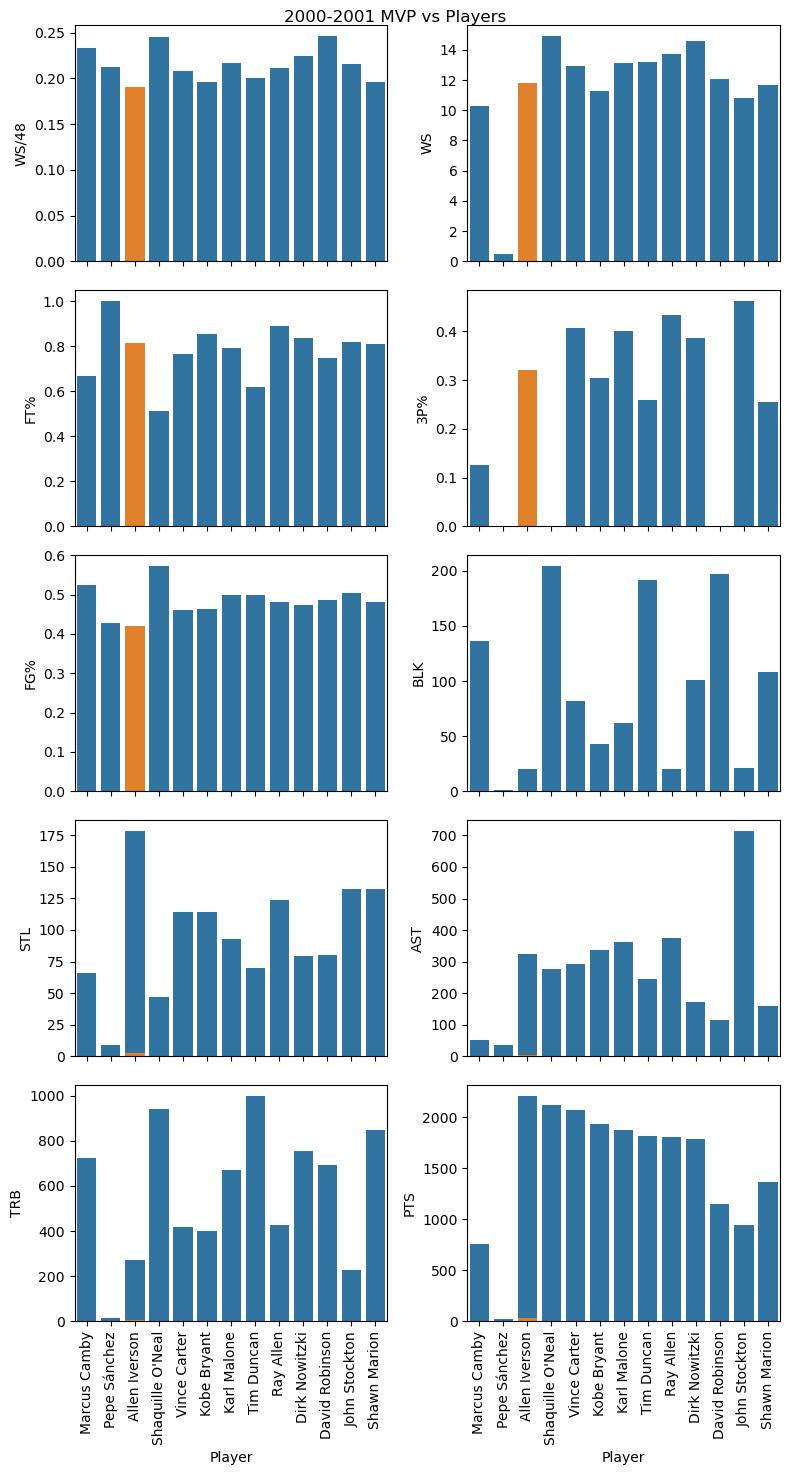

In [1261]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col") #put many graphs in one
fig.suptitle("2000-2001 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2000-2001"]
mvps_iverson = mvps[mvps["Player"] == "Allen Iverson"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()


In [1262]:
ptom[ptom["Year"] == "2000-2001"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
56,2000-2001,Marcus Camby,26.0,63.0,2127.0,759.0,723.0,52.0,66.0,136.0,0.524,0.125,0.667,10.3,0.233
130,2000-2001,Pepe Sánchez,23.0,24.0,116.0,20.0,14.0,36.0,9.0,1.0,0.429,0.000,1.000,0.5,0.212
133,2000-2001,Allen Iverson,25.0,71.0,2979.0,2207.0,273.0,325.0,178.0,20.0,0.420,0.320,0.814,11.8,0.190
134,2000-2001,Shaquille O'Neal,28.0,74.0,2924.0,2125.0,940.0,277.0,47.0,204.0,0.572,0.000,0.513,14.9,0.245
136,2000-2001,Vince Carter,24.0,75.0,2979.0,2070.0,416.0,291.0,114.0,82.0,0.460,0.408,0.765,12.9,0.208
139,2000-2001,Kobe Bryant,22.0,68.0,2783.0,1938.0,399.0,338.0,114.0,43.0,0.464,0.305,0.853,11.3,0.196
142,2000-2001,Karl Malone,37.0,81.0,2895.0,1878.0,669.0,361.0,93.0,62.0,0.498,0.400,0.793,13.1,0.217
144,2000-2001,Tim Duncan,24.0,82.0,3174.0,1820.0,997.0,245.0,70.0,192.0,0.499,0.259,0.618,13.2,0.200
148,2000-2001,Ray Allen,25.0,82.0,3129.0,1806.0,428.0,374.0,124.0,20.0,0.480,0.433,0.888,13.7,0.211
150,2000-2001,Dirk Nowitzki,22.0,82.0,3125.0,1784.0,754.0,173.0,79.0,101.0,0.474,0.387,0.838,14.6,0.224


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Allen Iverson (mvp):
2207.0	273.0	325.0	178.0	20.0	0.420	0.320	0.814	11.8	0.190
Shaquille O'Neal:
2125.0	940.0	277.0	47.0	204.0	0.572	0.000	0.513	14.9	0.245
shaquille should have won
only wins in 4 categories by big amounts and the ones he loses he isnt far behind 

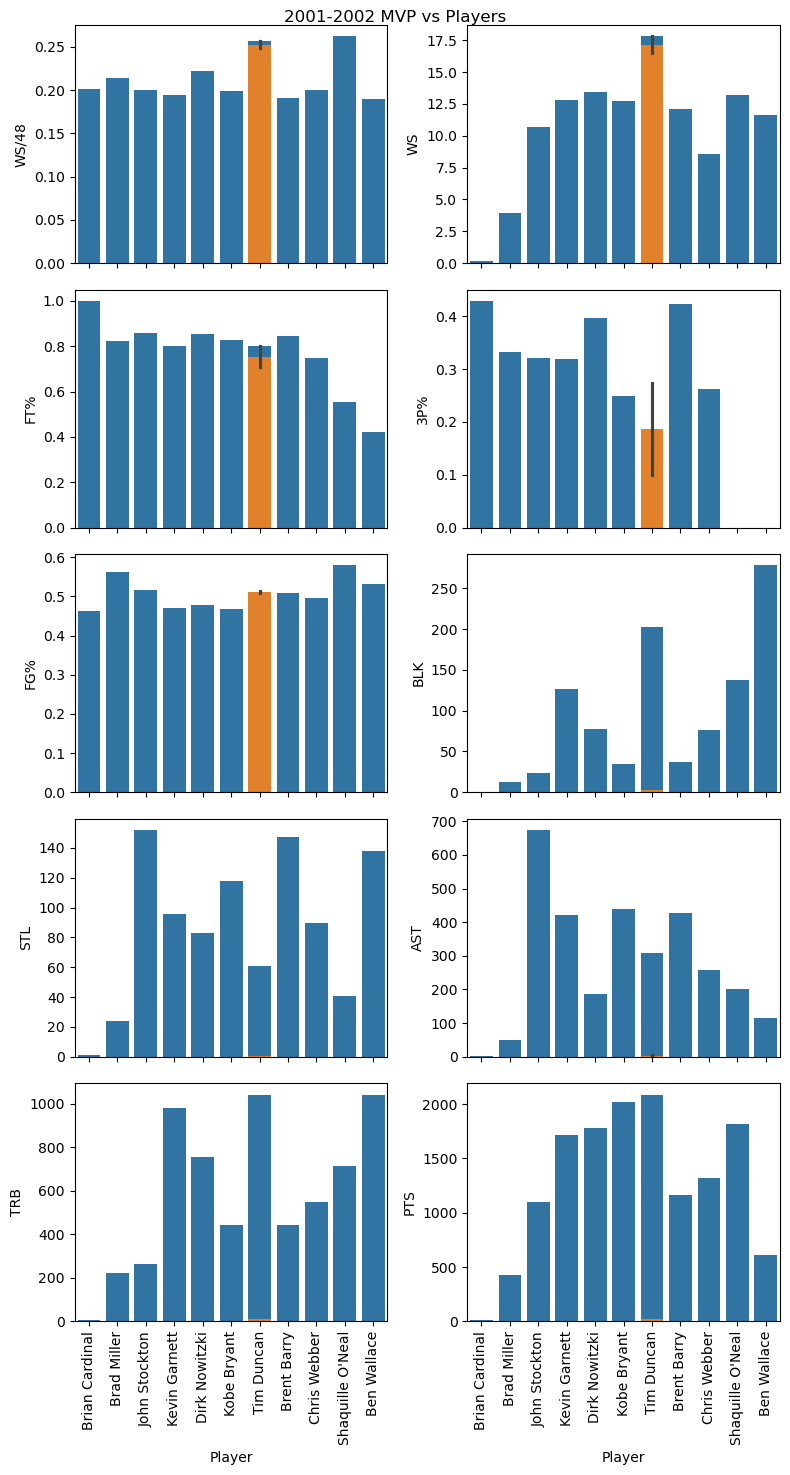

In [1263]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2001-2002 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2001-2002"]
mvps_iverson = mvps[mvps["Player"] == "Tim Duncan"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()


In [1264]:
ptom[ptom["Year"] == "2001-2002"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
529,2001-2002,Brian Cardinal,24.0,8.0,43.0,17.0,6.0,2.0,1.0,0.0,0.462,0.429,1.000,0.2,0.201
600,2001-2002,Brad Miller,25.0,28.0,872.0,424.0,220.0,51.0,24.0,12.0,0.562,0.333,0.823,3.9,0.214
611,2001-2002,John Stockton,39.0,82.0,2566.0,1102.0,263.0,674.0,152.0,24.0,0.517,0.321,0.857,10.7,0.200
663,2001-2002,Kevin Garnett,25.0,81.0,3175.0,1714.0,981.0,422.0,96.0,126.0,0.470,0.319,0.801,12.8,0.194
664,2001-2002,Dirk Nowitzki,23.0,76.0,2891.0,1779.0,755.0,186.0,83.0,77.0,0.477,0.397,0.853,13.4,0.222
670,2001-2002,Kobe Bryant,23.0,80.0,3063.0,2019.0,441.0,438.0,118.0,35.0,0.469,0.250,0.829,12.7,0.199
671,2001-2002,Tim Duncan,25.0,82.0,3329.0,2089.0,1042.0,307.0,61.0,203.0,0.508,0.100,0.799,17.8,0.257
677,2001-2002,Brent Barry,30.0,81.0,3040.0,1164.0,441.0,426.0,147.0,37.0,0.508,0.424,0.846,12.1,0.191
696,2001-2002,Chris Webber,28.0,54.0,2071.0,1322.0,546.0,258.0,90.0,76.0,0.495,0.263,0.749,8.6,0.200
706,2001-2002,Shaquille O'Neal,29.0,67.0,2422.0,1822.0,715.0,200.0,41.0,137.0,0.579,0.000,0.555,13.2,0.262


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Tim Duncan (mvp):
2089.0	1042.0	307.0	61.0	203.0	0.508	0.100	0.799	17.8	0.257
Kevin Garnett:
1714.0	981.0	422.0	96.0	126.0	0.470	0.319	0.801	12.8	0.194
Tim Duncan deserves the win
only wins in 5 categories by big amounts and the ones he loses he isnt far behind 

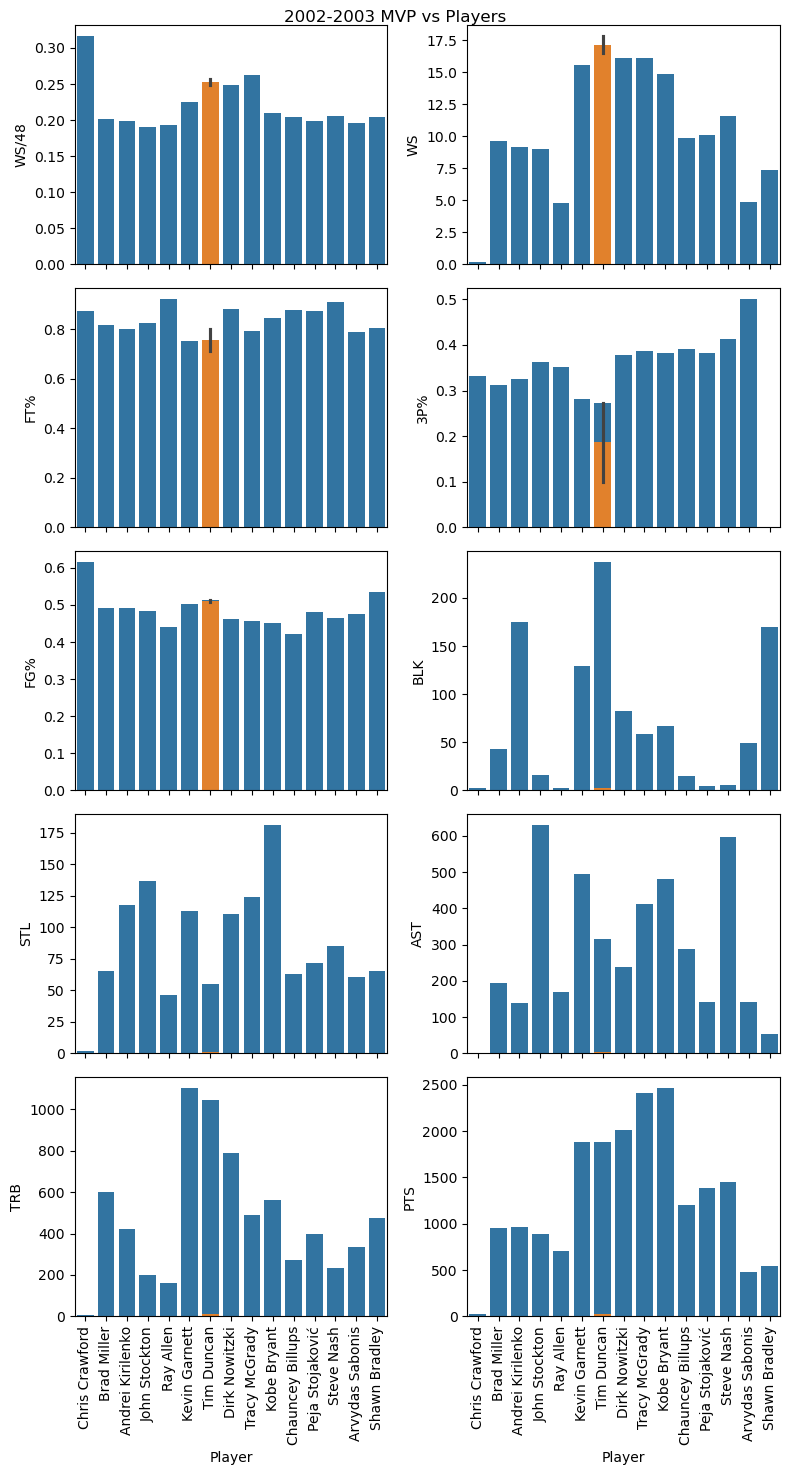

In [1265]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2002-2003 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2002-2003"]
mvps_iverson = mvps[mvps["Player"] == "Tim Duncan"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1266]:
ptom[ptom["Year"] == "2002-2003"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
919,2002-2003,Chris Crawford,27.0,5.0,38.0,24.0,7.0,1.0,2.0,3.0,0.615,0.333,0.875,0.2,0.316
984,2002-2003,Brad Miller,26.0,73.0,2270.0,955.0,603.0,193.0,65.0,43.0,0.493,0.313,0.818,9.6,0.202
985,2002-2003,Andrei Kirilenko,21.0,80.0,2213.0,963.0,420.0,138.0,118.0,175.0,0.491,0.325,0.800,9.2,0.199
1028,2002-2003,John Stockton,40.0,82.0,2275.0,884.0,201.0,629.0,137.0,16.0,0.483,0.363,0.826,9.0,0.190
1046,2002-2003,Ray Allen,27.0,29.0,1197.0,710.0,163.0,170.0,46.0,3.0,0.441,0.351,0.920,4.8,0.193
1055,2002-2003,Kevin Garnett,26.0,82.0,3321.0,1883.0,1102.0,495.0,113.0,129.0,0.502,0.282,0.751,15.6,0.225
1056,2002-2003,Tim Duncan,26.0,81.0,3181.0,1884.0,1043.0,316.0,55.0,237.0,0.513,0.273,0.710,16.5,0.248
1057,2002-2003,Dirk Nowitzki,24.0,80.0,3117.0,2011.0,791.0,239.0,111.0,82.0,0.463,0.379,0.881,16.1,0.249
1060,2002-2003,Tracy McGrady,23.0,75.0,2954.0,2407.0,488.0,411.0,124.0,59.0,0.457,0.386,0.793,16.1,0.262
1061,2002-2003,Kobe Bryant,24.0,82.0,3401.0,2461.0,564.0,481.0,181.0,67.0,0.451,0.383,0.843,14.9,0.210


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Tim Duncan (mvp):
1884.0	1043.0	316.0	55.0	237.0	0.513	0.273	0.710	16.5	0.248
Kevin Garnett:
1883.0	1102.0	495.0	113.0	129.0	0.502	0.282	0.751	15.6	0.225
Kevin Garnett should have one
wins in 6 categories by small amounts and the ones he loses he isnt far behind 

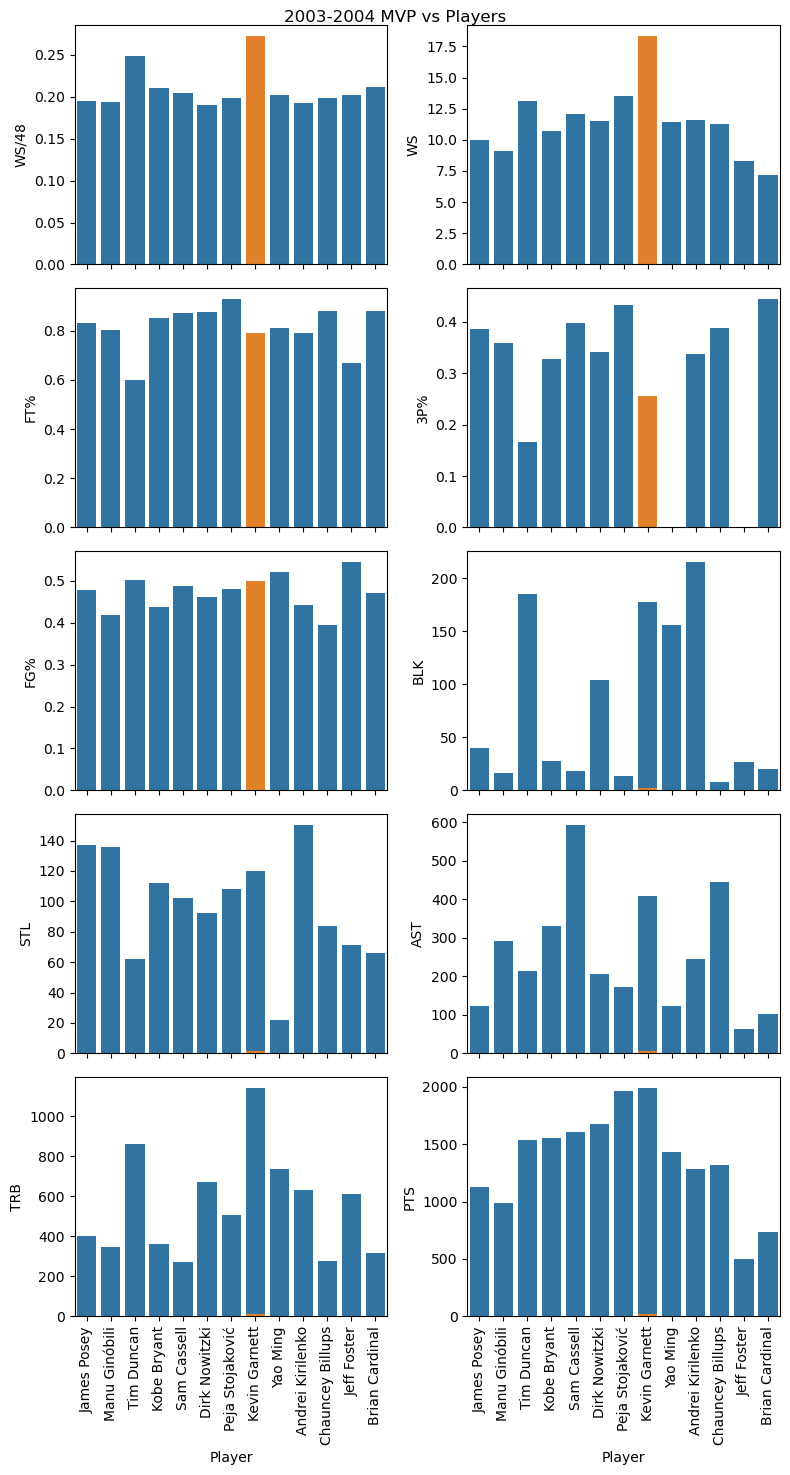

In [1267]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2003-2004 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2003-2004"]
mvps_iverson = mvps[mvps["Player"] == "Kevin Garnett"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1295]:
ptom[ptom["Year"] == "2003-2004"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
1211,2003-2004,James Posey,27.0,82.0,2451.0,1126.0,403.0,122.0,137.0,40.0,0.478,0.386,0.830,10.0,0.195
1244,2003-2004,Manu Ginóbili,26.0,77.0,2260.0,987.0,344.0,291.0,136.0,16.0,0.418,0.359,0.802,9.1,0.194
1261,2003-2004,Tim Duncan,27.0,69.0,2527.0,1538.0,859.0,213.0,62.0,185.0,0.501,0.167,0.599,13.1,0.249
1262,2003-2004,Kobe Bryant,25.0,65.0,2447.0,1557.0,359.0,330.0,112.0,28.0,0.438,0.327,0.852,10.7,0.210
1264,2003-2004,Sam Cassell,34.0,81.0,2838.0,1603.0,271.0,592.0,102.0,18.0,0.488,0.398,0.873,12.1,0.205
1271,2003-2004,Dirk Nowitzki,25.0,77.0,2915.0,1680.0,670.0,207.0,92.0,104.0,0.462,0.341,0.877,11.5,0.190
1276,2003-2004,Peja Stojaković,26.0,81.0,3264.0,1964.0,508.0,173.0,108.0,14.0,0.480,0.433,0.927,13.5,0.198
1277,2003-2004,Kevin Garnett,27.0,82.0,3231.0,1987.0,1139.0,409.0,120.0,178.0,0.499,0.256,0.791,18.3,0.272
1280,2003-2004,Yao Ming,23.0,82.0,2692.0,1431.0,735.0,122.0,22.0,156.0,0.522,0.000,0.809,11.4,0.202
1289,2003-2004,Andrei Kirilenko,22.0,78.0,2895.0,1284.0,629.0,244.0,150.0,215.0,0.443,0.338,0.790,11.6,0.192


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Kevin Garnett (mvp):
1987.0	1139.0	409.0	120.0	178.0	0.499	0.256	0.791	18.3	0.272
Andrei Kirilenko:
1284.0	629.0	244.0	150.0	215.0	0.443	0.338	0.790	11.6	0.192
Peja Stojaković:
1964.0	508.0	173.0	108.0	14.0	0.480	0.433	0.927	13.5	0.198

Kevin Garnett wins deservingly
wins in 6 categories by small amounts and the ones he loses he isnt far behind 

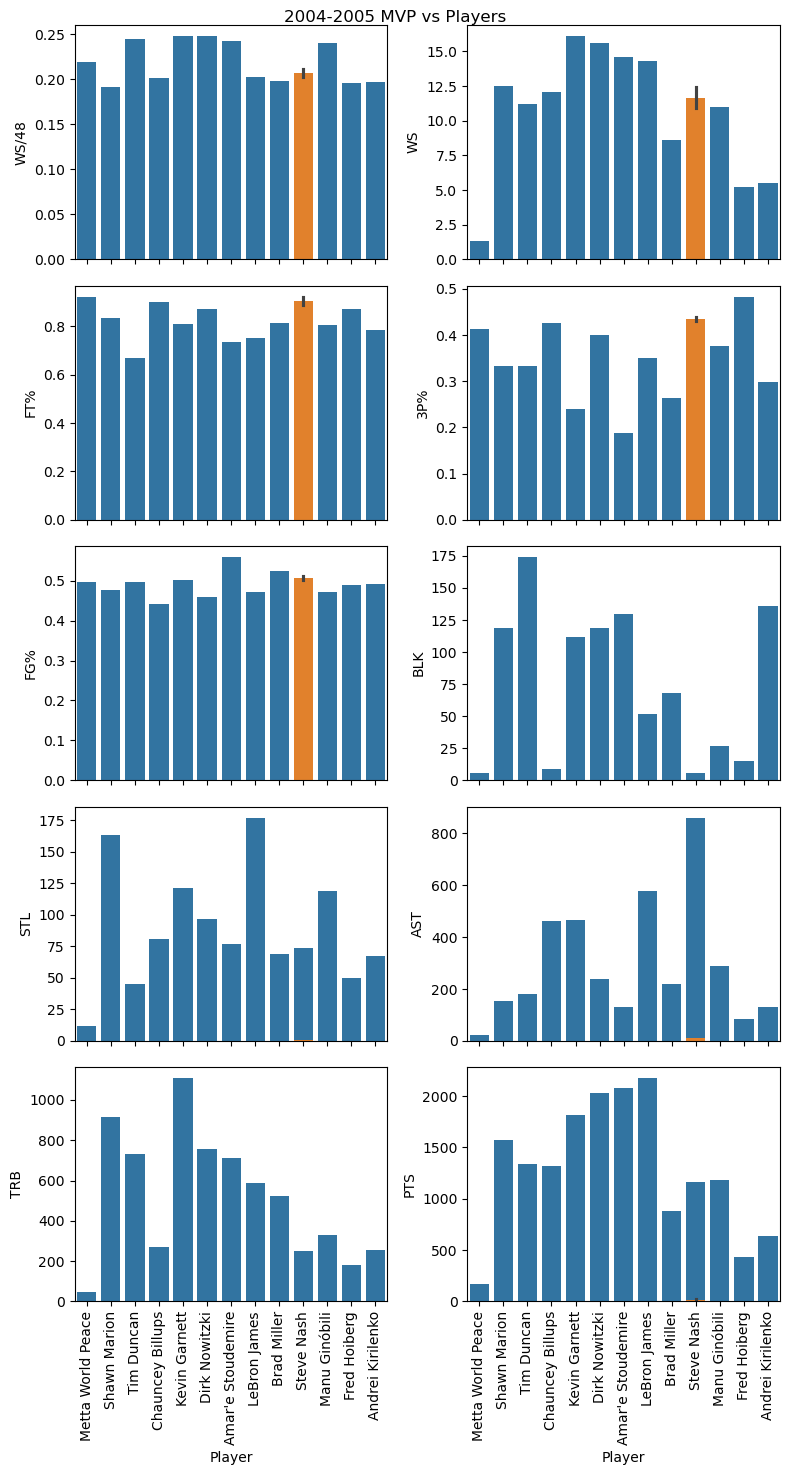

In [1268]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2004-2005 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2004-2005"]
mvps_iverson = mvps[mvps["Player"] == "Steve Nash"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1296]:
ptom[ptom["Year"] == "2004-2005"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
1682,2004-2005,Metta World Peace,25.0,7.0,291.0,172.0,45.0,22.0,12.0,6.0,0.496,0.412,0.922,1.3,0.219
1843,2004-2005,Shawn Marion,26.0,81.0,3146.0,1569.0,915.0,154.0,163.0,119.0,0.476,0.334,0.833,12.5,0.191
1863,2004-2005,Tim Duncan,28.0,66.0,2203.0,1342.0,732.0,179.0,45.0,174.0,0.496,0.333,0.670,11.2,0.245
1864,2004-2005,Chauncey Billups,28.0,80.0,2866.0,1316.0,271.0,464.0,81.0,9.0,0.442,0.426,0.898,12.1,0.202
1886,2004-2005,Kevin Garnett,28.0,82.0,3121.0,1817.0,1108.0,466.0,121.0,112.0,0.502,0.240,0.811,16.1,0.248
1894,2004-2005,Dirk Nowitzki,26.0,78.0,3020.0,2032.0,757.0,240.0,97.0,119.0,0.459,0.399,0.869,15.6,0.248
1896,2004-2005,Amar'e Stoudemire,22.0,80.0,2889.0,2080.0,713.0,131.0,77.0,130.0,0.559,0.188,0.733,14.6,0.243
1897,2004-2005,LeBron James,20.0,80.0,3388.0,2175.0,588.0,577.0,177.0,52.0,0.472,0.351,0.750,14.3,0.203
1930,2004-2005,Brad Miller,28.0,56.0,2089.0,876.0,521.0,220.0,69.0,68.0,0.524,0.263,0.812,8.6,0.198
1948,2004-2005,Steve Nash,30.0,75.0,2573.0,1165.0,249.0,861.0,74.0,6.0,0.502,0.431,0.887,10.9,0.203


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Steve Nash (mvp):
1165.0	249.0	861.0	74.0	6.0	   0.502	0.431	0.887	10.9	0.203
Kevin Garnett:
1817.0	1108.0	466.0	121.0	112.0	0.502	0.240	0.811	16.1	0.248
Dirk Nowitzki:
2032.0	757.0	240.0	97.0	119.0	0.459	0.399	0.869	15.6	0.248

Kevin Garnett should have won or Dirk Nowitzki, Steve Nash shouldnt have won, by a bit kevin should have won
wins in 5 categories by small amounts and the ones he loses he isnt far behind 

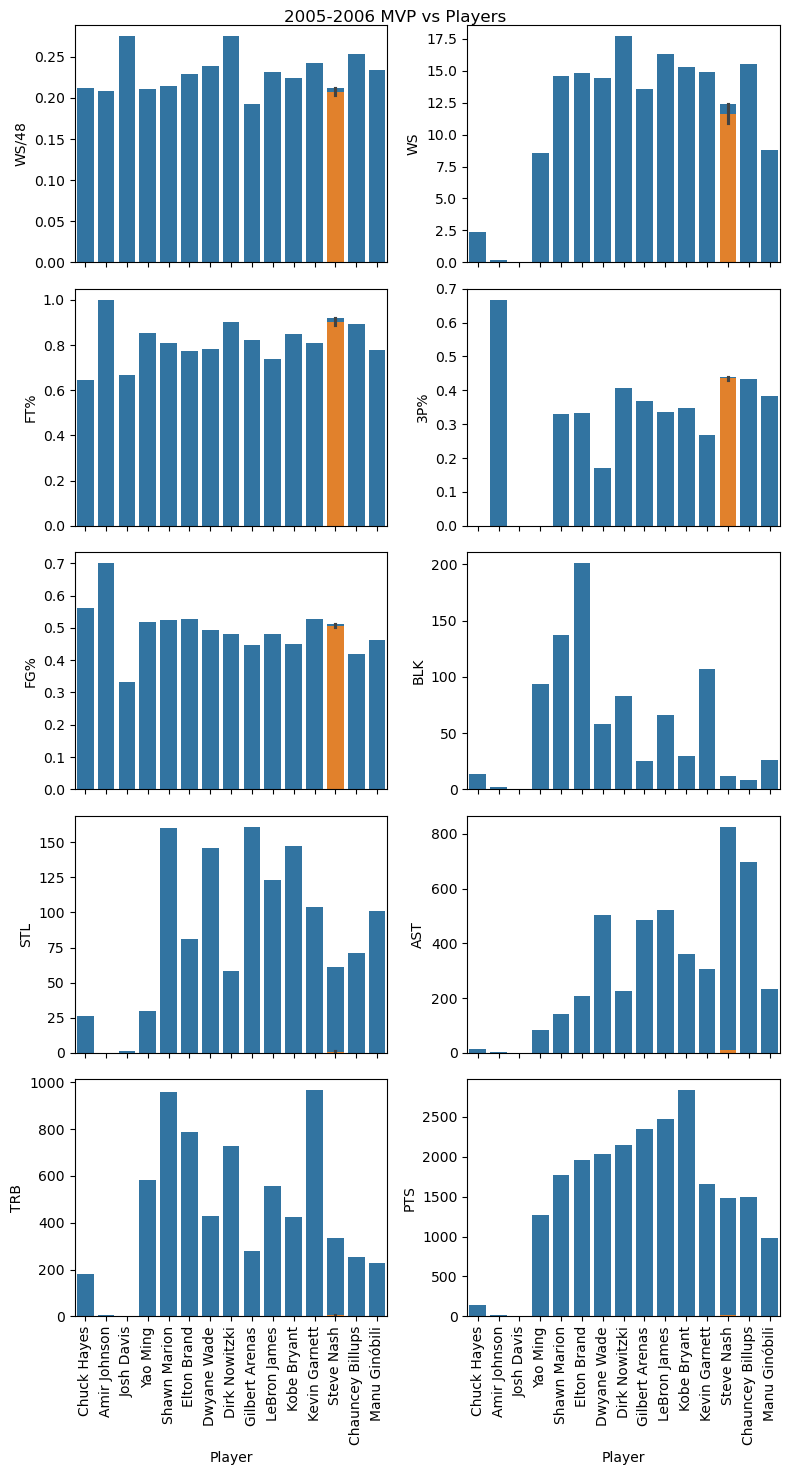

In [1269]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2005-2006 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2005-2006"]
mvps_iverson = mvps[mvps["Player"] == "Steve Nash"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1297]:
ptom[ptom["Year"] == "2005-2006"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
2360,2005-2006,Chuck Hayes,22.0,40.0,535.0,147.0,179.0,14.0,26.0,14.0,0.562,0.000,0.644,2.4,0.212
2372,2005-2006,Amir Johnson,18.0,3.0,39.0,20.0,4.0,3.0,0.0,2.0,0.700,0.667,1.000,0.2,0.208
2373,2005-2006,Josh Davis,25.0,1.0,5.0,4.0,1.0,0.0,1.0,0.0,0.333,0.000,0.667,0.0,0.275
2388,2005-2006,Yao Ming,25.0,57.0,1949.0,1271.0,581.0,85.0,30.0,94.0,0.519,0.000,0.853,8.6,0.211
2423,2005-2006,Shawn Marion,27.0,81.0,3263.0,1769.0,959.0,143.0,160.0,137.0,0.525,0.331,0.809,14.6,0.214
2425,2005-2006,Elton Brand,26.0,79.0,3099.0,1953.0,790.0,208.0,81.0,201.0,0.527,0.333,0.775,14.8,0.229
2428,2005-2006,Dwyane Wade,24.0,75.0,2892.0,2040.0,430.0,503.0,146.0,58.0,0.495,0.171,0.783,14.4,0.239
2431,2005-2006,Dirk Nowitzki,27.0,81.0,3089.0,2151.0,728.0,226.0,58.0,83.0,0.480,0.406,0.901,17.7,0.275
2432,2005-2006,Gilbert Arenas,24.0,80.0,3384.0,2346.0,280.0,484.0,161.0,25.0,0.447,0.369,0.820,13.6,0.193
2434,2005-2006,LeBron James,21.0,79.0,3361.0,2478.0,556.0,521.0,123.0,66.0,0.480,0.335,0.738,16.3,0.232


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Steve Nash (mvp):
1489.0	333.0	826.0	61.0	12.0	0.512	0.439	0.921	12.4	0.212
Elton Brand:
1953.0	790.0	208.0	81.0	201.0	0.527	0.333	0.775	14.8	0.229
LeBron James:
2478.0	556.0	521.0	123.0	66.0	0.480	0.335	0.738	16.3	0.232

Elton Brand should have won or LeBron James, Steve Nash shouldnt have won, by a bit LeBron James should have won
wins in 6 categories by small amounts and the ones he loses he isnt far behind 

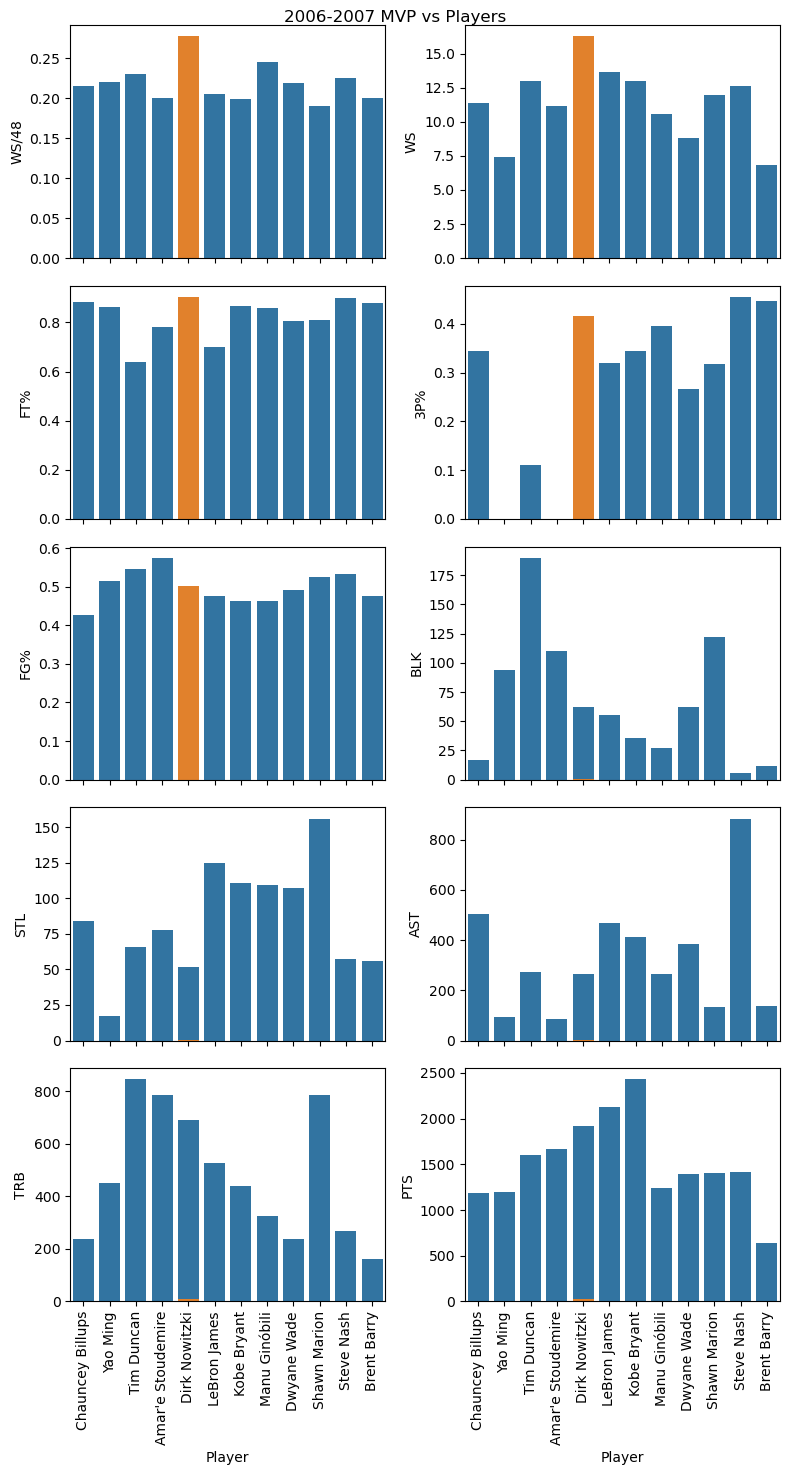

In [1270]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2006-2007 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2006-2007"]
mvps_iverson = mvps[mvps["Player"] == "Dirk Nowitzki"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1298]:
ptom[ptom["Year"] == "2006-2007"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
2561,2006-2007,Chauncey Billups,30.0,70.0,2533.0,1191.0,237.0,502.0,84.0,17.0,0.427,0.345,0.883,11.4,0.216
2591,2006-2007,Yao Ming,26.0,48.0,1624.0,1202.0,452.0,94.0,17.0,94.0,0.516,0.000,0.862,7.4,0.220
2600,2006-2007,Tim Duncan,30.0,80.0,2726.0,1599.0,846.0,273.0,66.0,190.0,0.546,0.111,0.637,13.0,0.230
2603,2006-2007,Amar'e Stoudemire,24.0,82.0,2689.0,1671.0,786.0,84.0,78.0,110.0,0.575,0.000,0.781,11.2,0.201
2611,2006-2007,Dirk Nowitzki,28.0,78.0,2820.0,1916.0,693.0,263.0,52.0,62.0,0.502,0.416,0.904,16.3,0.278
2614,2006-2007,LeBron James,22.0,78.0,3190.0,2132.0,526.0,470.0,125.0,55.0,0.476,0.319,0.698,13.7,0.206
2615,2006-2007,Kobe Bryant,28.0,77.0,3140.0,2430.0,439.0,413.0,111.0,36.0,0.463,0.344,0.868,13.0,0.199
2622,2006-2007,Manu Ginóbili,29.0,75.0,2060.0,1240.0,327.0,263.0,109.0,27.0,0.464,0.396,0.860,10.6,0.246
2641,2006-2007,Dwyane Wade,25.0,51.0,1931.0,1397.0,239.0,384.0,107.0,62.0,0.491,0.266,0.807,8.8,0.219
2642,2006-2007,Shawn Marion,28.0,80.0,3010.0,1403.0,785.0,134.0,156.0,122.0,0.524,0.317,0.810,12.0,0.191


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Dirk Nowitzki (mvp):
1916.0	693.0	263.0	52.0	62.0	0.502	0.416	0.904	16.3	0.278
Shawn Marion:
1403.0	785.0	134.0	156.0	122.0	0.524	0.317	0.810	12.0	0.191

Dirk Nowitzki deservingly wins
wins in 6 categories by small amounts and the ones he loses he isnt far behind 

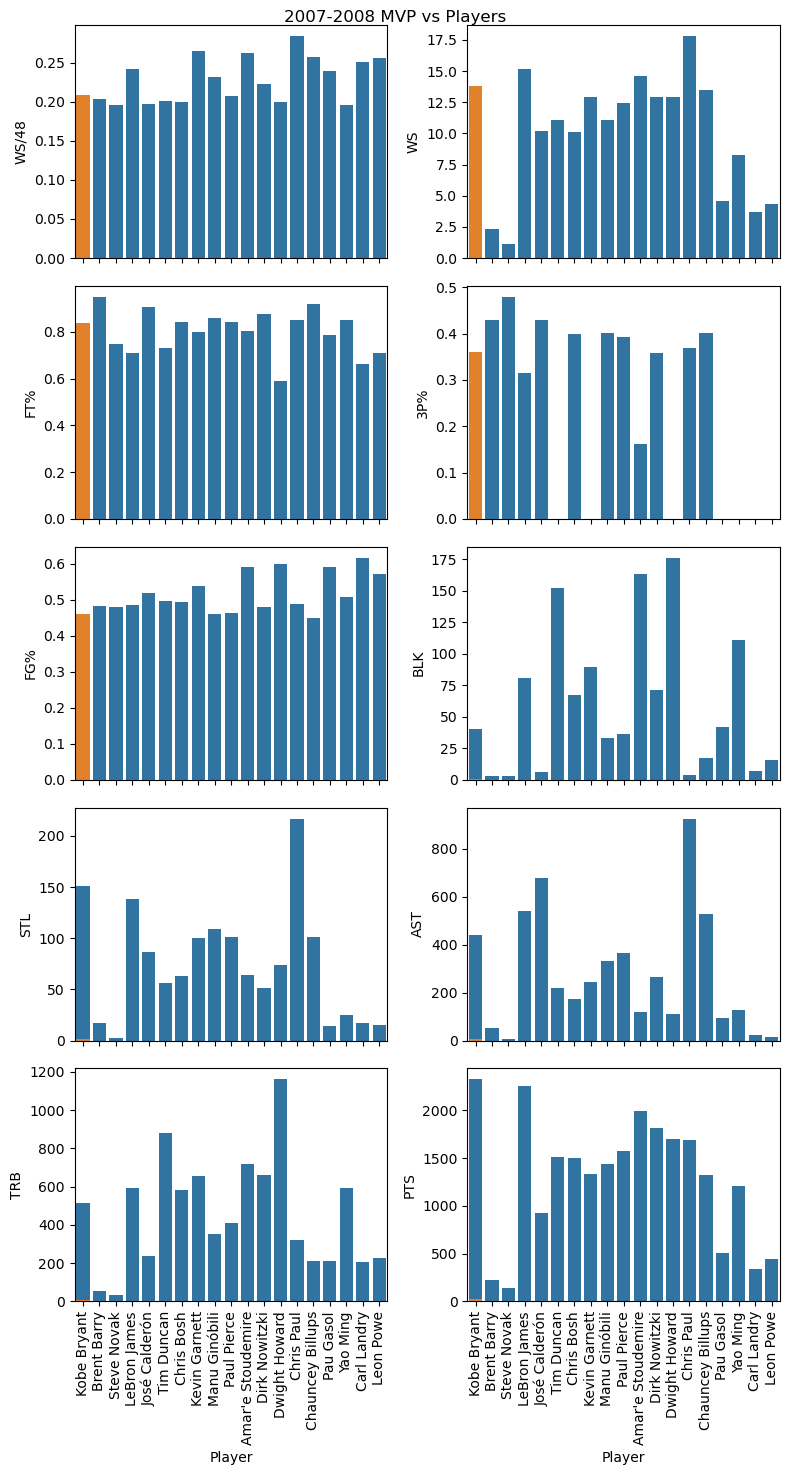

In [1271]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2007-2008 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2007-2008"]
mvps_iverson = mvps[mvps["Player"] == "Kobe Bryant"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1299]:
ptom[ptom["Year"] == "2007-2008"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
2982,2007-2008,Kobe Bryant,29.0,82.0,3192.0,2323.0,517.0,441.0,151.0,40.0,0.459,0.361,0.840,13.8,0.208
3021,2007-2008,Brent Barry,36.0,31.0,554.0,221.0,55.0,54.0,17.0,3.0,0.481,0.429,0.950,2.3,0.203
3057,2007-2008,Steve Novak,24.0,35.0,264.0,135.0,35.0,6.0,2.0,3.0,0.480,0.479,0.750,1.1,0.196
3077,2007-2008,LeBron James,23.0,75.0,3027.0,2250.0,592.0,539.0,138.0,81.0,0.484,0.315,0.712,15.2,0.242
3097,2007-2008,José Calderón,26.0,82.0,2484.0,922.0,236.0,678.0,87.0,6.0,0.519,0.429,0.908,10.2,0.197
3167,2007-2008,Tim Duncan,31.0,78.0,2651.0,1508.0,881.0,218.0,56.0,152.0,0.497,0.000,0.730,11.1,0.201
3168,2007-2008,Chris Bosh,23.0,67.0,2425.0,1496.0,583.0,171.0,63.0,67.0,0.494,0.400,0.844,10.1,0.200
3179,2007-2008,Kevin Garnett,31.0,71.0,2328.0,1337.0,655.0,244.0,100.0,89.0,0.539,0.000,0.801,12.9,0.265
3181,2007-2008,Manu Ginóbili,30.0,74.0,2299.0,1442.0,354.0,332.0,109.0,33.0,0.460,0.401,0.860,11.1,0.232
3182,2007-2008,Paul Pierce,30.0,80.0,2874.0,1570.0,411.0,363.0,101.0,36.0,0.464,0.392,0.843,12.4,0.207


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Kobe Bryant (mvp):
1916.0	693.0	263.0	52.0	62.0	0.502	0.416	0.904	16.3	0.278
Amar'e Stoudemire:
1403.0	785.0	134.0	156.0	122.0	0.524	0.317	0.810	12.0	0.191
Chris Paul:
1684.0	321.0	925.0	217.0	4.0	   0.488	0.369	0.851	17.8	0.284
Kobe should have not won, wins in 3 categories, chris paul and amar'e are better fits, chris a bit more
wins in 4 categories by small amounts and the ones he loses might be far behind 

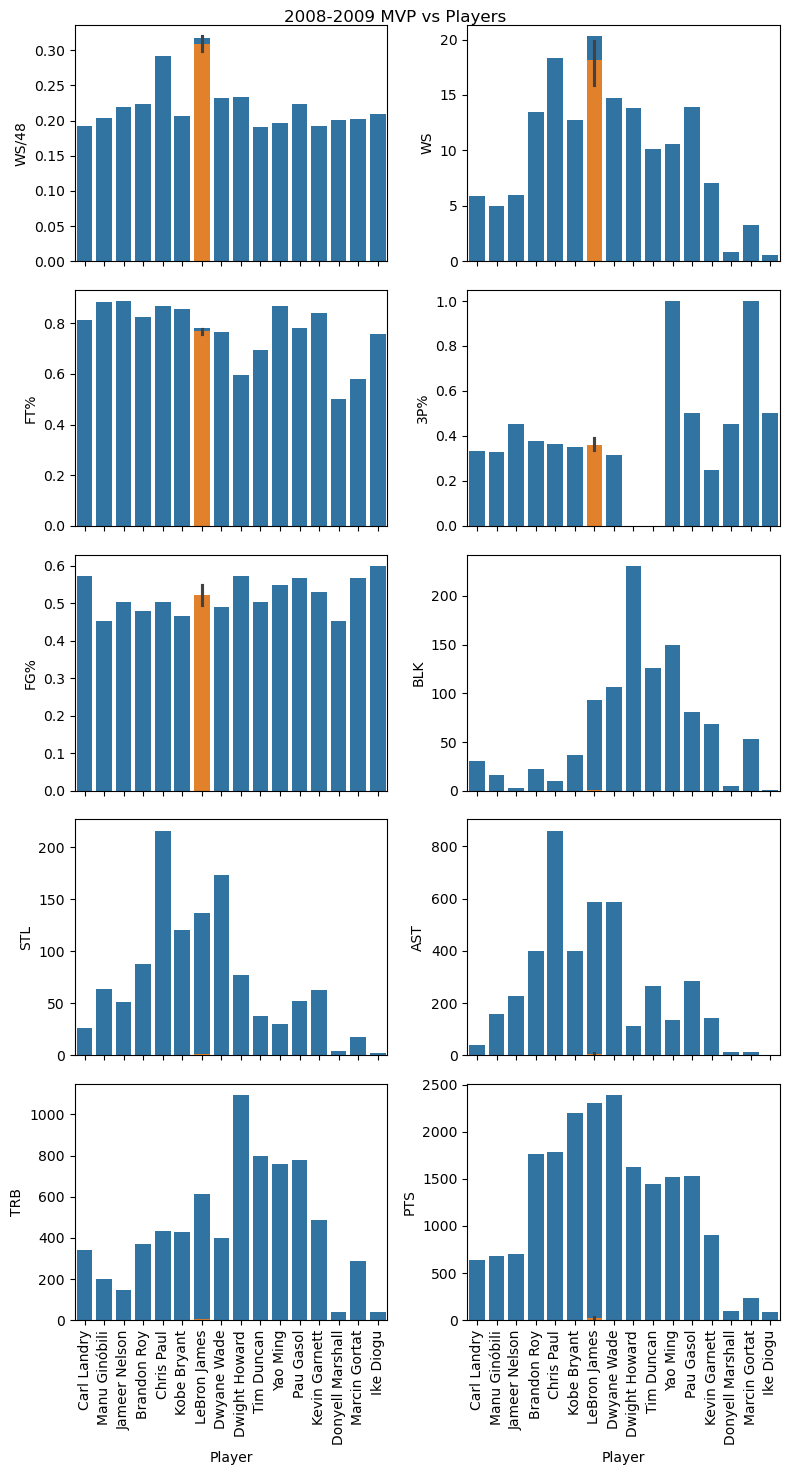

In [1272]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2008-2009 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2008-2009"]
mvps_iverson = mvps[mvps["Player"] == "LeBron James"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1300]:
ptom[ptom["Year"] == "2008-2009"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
3418,2008-2009,Carl Landry,25.0,69.0,1467.0,638.0,343.0,39.0,26.0,31.0,0.574,0.333,0.813,5.9,0.193
3468,2008-2009,Manu Ginóbili,31.0,44.0,1181.0,683.0,198.0,157.0,64.0,16.0,0.454,0.330,0.884,5.0,0.203
3477,2008-2009,Jameer Nelson,26.0,42.0,1309.0,702.0,145.0,226.0,51.0,3.0,0.503,0.453,0.887,6.0,0.220
3595,2008-2009,Brandon Roy,24.0,78.0,2903.0,1765.0,370.0,400.0,88.0,22.0,0.480,0.377,0.824,13.5,0.223
3596,2008-2009,Chris Paul,23.0,78.0,3002.0,1781.0,432.0,861.0,216.0,10.0,0.503,0.364,0.868,18.3,0.292
3600,2008-2009,Kobe Bryant,30.0,82.0,2960.0,2201.0,429.0,399.0,120.0,37.0,0.467,0.351,0.856,12.7,0.206
3601,2008-2009,LeBron James,24.0,81.0,3054.0,2304.0,613.0,587.0,137.0,93.0,0.489,0.344,0.780,20.3,0.318
3602,2008-2009,Dwyane Wade,27.0,79.0,3048.0,2386.0,398.0,589.0,173.0,106.0,0.491,0.317,0.765,14.7,0.232
3604,2008-2009,Dwight Howard,23.0,79.0,2821.0,1624.0,1093.0,112.0,77.0,231.0,0.572,0.000,0.594,13.8,0.234
3611,2008-2009,Tim Duncan,32.0,75.0,2524.0,1450.0,800.0,264.0,38.0,126.0,0.504,0.000,0.692,10.1,0.191


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
LeBron James (mvp):
2304.0	613.0	587.0	137.0	93.0	0.489	0.344	0.780	20.3	0.318
Chris Paul:
1781.0	432.0	861.0	216.0	10.0	0.503	0.364	0.868	18.3	0.292
Dwight Howard:
1624.0	1093.0	112.0	77.0	231.0	0.572	0.000	0.594	13.8	0.234
LeBron should have not won, wins in 3 categories, chris paul and Dwight Howard are at a similar spot, chris a bit more
wins in 6 categories by small amounts and the ones he loses might be far behind 

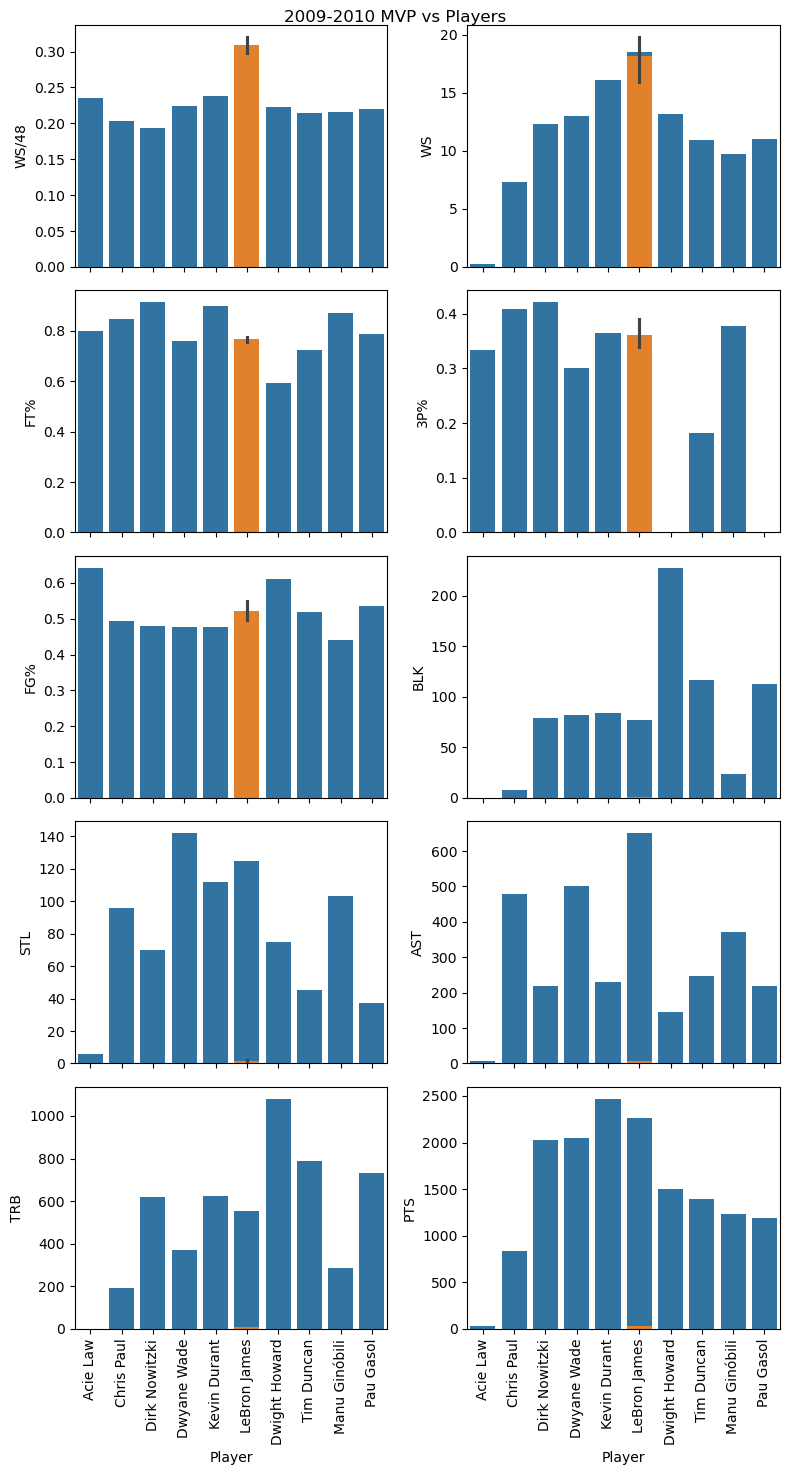

In [1273]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2009-2010 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2009-2010"]
mvps_iverson = mvps[mvps["Player"] == "LeBron James"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1301]:
ptom[ptom["Year"] == "2009-2010"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
4055,2009-2010,Acie Law,25.0,5.0,66.0,31.0,2.0,7.0,6.0,0.0,0.643,0.333,0.800,0.3,0.236
4135,2009-2010,Chris Paul,24.0,45.0,1712.0,841.0,191.0,480.0,96.0,8.0,0.493,0.409,0.847,7.3,0.204
4158,2009-2010,Dirk Nowitzki,31.0,81.0,3039.0,2027.0,620.0,218.0,70.0,79.0,0.481,0.421,0.915,12.3,0.194
4160,2009-2010,Dwyane Wade,28.0,77.0,2792.0,2045.0,373.0,501.0,142.0,82.0,0.476,0.300,0.761,13.0,0.224
4161,2009-2010,Kevin Durant,21.0,82.0,3239.0,2472.0,623.0,231.0,112.0,84.0,0.476,0.365,0.900,16.1,0.238
4167,2009-2010,LeBron James,25.0,76.0,2966.0,2258.0,554.0,651.0,125.0,77.0,0.503,0.333,0.767,18.5,0.299
4175,2009-2010,Dwight Howard,24.0,82.0,2843.0,1503.0,1082.0,144.0,75.0,228.0,0.612,0.000,0.592,13.2,0.223
4184,2009-2010,Tim Duncan,33.0,78.0,2438.0,1395.0,788.0,246.0,45.0,117.0,0.518,0.182,0.725,10.9,0.215
4189,2009-2010,Manu Ginóbili,32.0,75.0,2150.0,1237.0,284.0,370.0,103.0,24.0,0.441,0.377,0.870,9.7,0.216
4199,2009-2010,Pau Gasol,29.0,65.0,2403.0,1190.0,734.0,218.0,37.0,113.0,0.536,0.000,0.790,11.0,0.220


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
LeBron James (mvp):
2258.0	554.0	651.0	125.0	77.0	0.503	0.333	0.767	18.5	0.299
Kevin Durant:
2472.0	623.0	231.0	112.0	84.0	0.476	0.365	0.900	16.1	0.238

LeBron wins in 6 categories but kevin durant isnt far behind and could also be an mvp

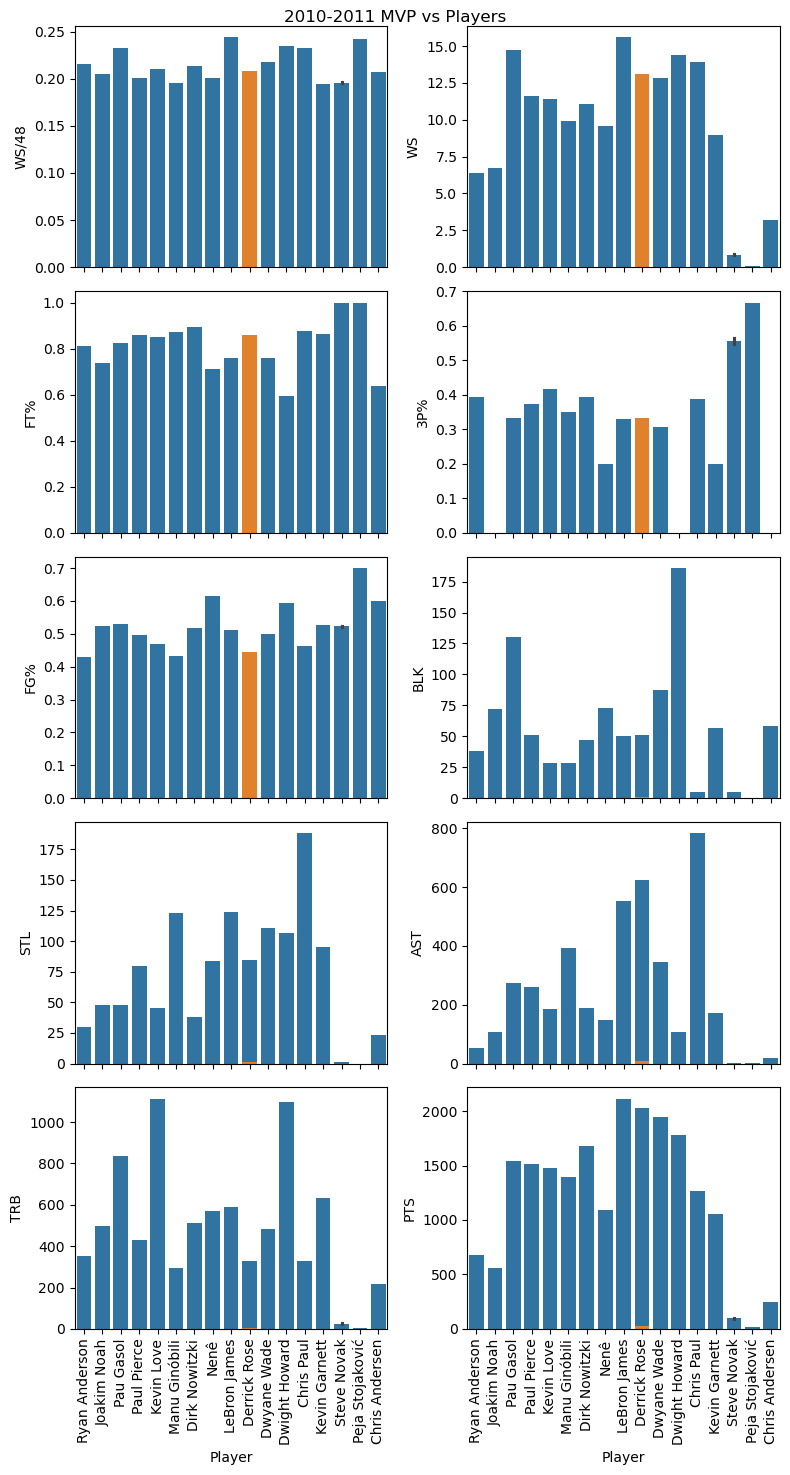

In [1274]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2010-2011 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2010-2011"]
mvps_iverson = mvps[mvps["Player"] == "Derrick Rose"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1302]:
ptom[ptom["Year"] == "2010-2011"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
4410,2010-2011,Ryan Anderson,22.0,64.0,1424.0,681.0,355.0,52.0,30.0,38.0,0.430,0.393,0.812,6.4,0.216
4474,2010-2011,Joakim Noah,25.0,48.0,1576.0,561.0,498.0,107.0,48.0,72.0,0.525,0.000,0.739,6.7,0.205
4498,2010-2011,Pau Gasol,30.0,82.0,3037.0,1541.0,836.0,273.0,48.0,130.0,0.529,0.333,0.823,14.7,0.232
4499,2010-2011,Paul Pierce,33.0,80.0,2774.0,1511.0,430.0,260.0,80.0,51.0,0.497,0.374,0.860,11.6,0.201
4501,2010-2011,Kevin Love,22.0,73.0,2611.0,1476.0,1112.0,184.0,45.0,28.0,0.470,0.417,0.850,11.4,0.210
4507,2010-2011,Manu Ginóbili,33.0,80.0,2426.0,1393.0,295.0,393.0,123.0,28.0,0.433,0.349,0.871,9.9,0.195
4514,2010-2011,Dirk Nowitzki,32.0,73.0,2504.0,1681.0,513.0,190.0,38.0,47.0,0.517,0.393,0.892,11.1,0.213
4517,2010-2011,Nenê,28.0,75.0,2291.0,1091.0,571.0,149.0,84.0,73.0,0.615,0.200,0.711,9.6,0.201
4519,2010-2011,LeBron James,26.0,79.0,3063.0,2111.0,590.0,554.0,124.0,50.0,0.510,0.330,0.759,15.6,0.244
4521,2010-2011,Derrick Rose,22.0,81.0,3026.0,2026.0,330.0,623.0,85.0,51.0,0.445,0.332,0.858,13.1,0.208


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Derrick Rose (mvp):
2026.0	330.0	623.0	85.0	51.0	0.445	0.332	0.858	13.1	0.208
LeBron James:
2111.0	590.0	554.0	124.0	50.0	0.510	0.330	0.759	15.6	0.244
Dwight Howard:
1784.0	1098.0	107.0	107.0	186.0	0.593	0.000	0.596	14.4	0.235
Derrick should have not won, wins in 3 categories, LeBron James and Dwight Howard are at a similar spot, lebron wins in 5 (not by much)

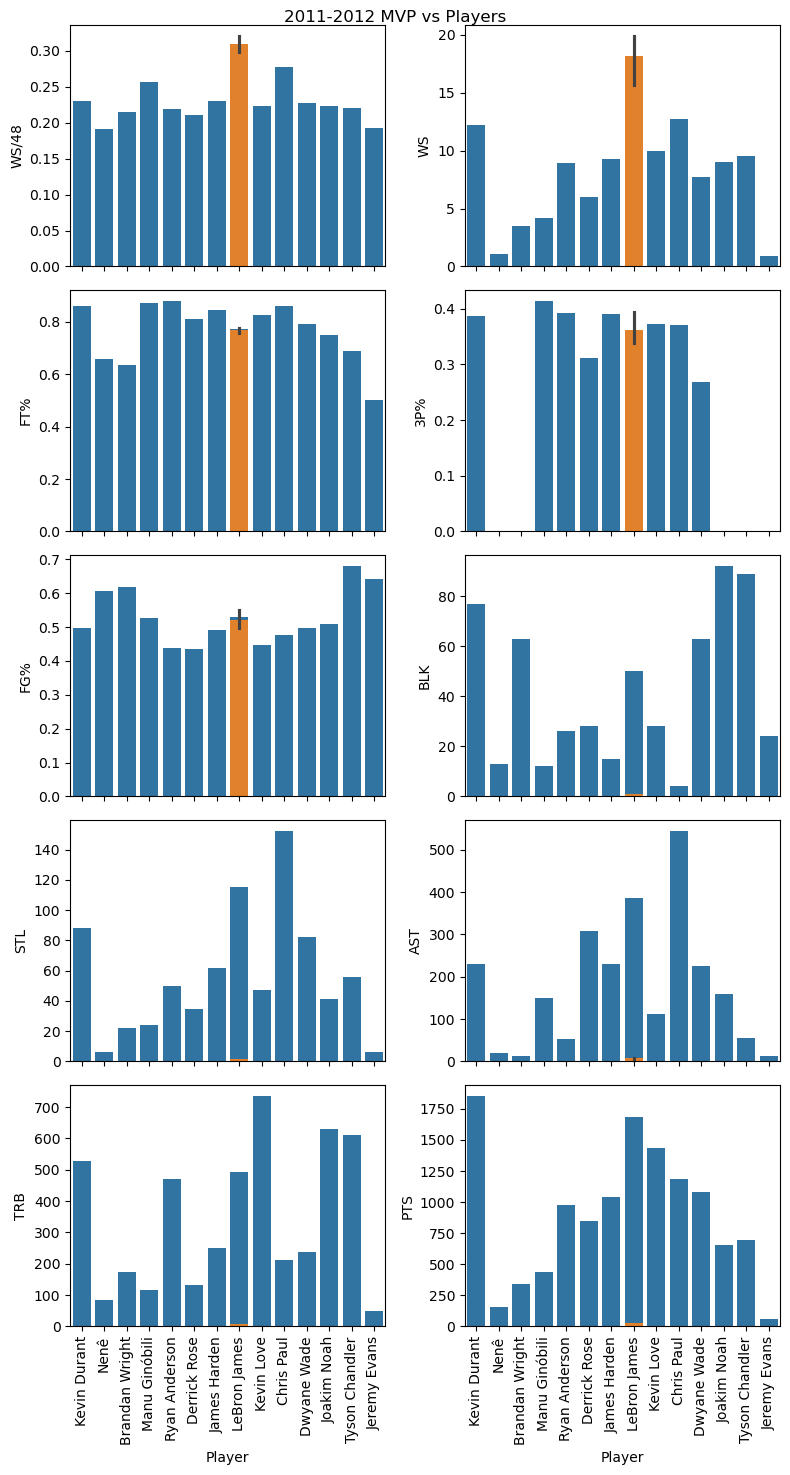

In [1275]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2011-2012 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2011-2012"]
mvps_iverson = mvps[mvps["Player"] == "LeBron James"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1303]:
ptom[ptom["Year"] == "2011-2012"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
4854,2011-2012,Kevin Durant,23.0,66.0,2546.0,1850.0,527.0,231.0,88.0,77.0,0.496,0.387,0.860,12.2,0.230
4909,2011-2012,Nenê,29.0,11.0,284.0,159.0,83.0,19.0,6.0,13.0,0.607,0.000,0.657,1.1,0.191
4919,2011-2012,Brandan Wright,24.0,49.0,791.0,340.0,174.0,13.0,22.0,63.0,0.618,0.000,0.634,3.5,0.215
4969,2011-2012,Manu Ginóbili,34.0,34.0,792.0,440.0,116.0,151.0,24.0,12.0,0.526,0.413,0.871,4.2,0.257
4986,2011-2012,Ryan Anderson,23.0,61.0,1964.0,980.0,471.0,54.0,50.0,26.0,0.439,0.393,0.877,8.9,0.219
5002,2011-2012,Derrick Rose,23.0,39.0,1375.0,852.0,131.0,307.0,35.0,28.0,0.435,0.312,0.812,6.0,0.211
5012,2011-2012,James Harden,22.0,62.0,1946.0,1044.0,252.0,229.0,62.0,15.0,0.491,0.390,0.846,9.3,0.230
5014,2011-2012,LeBron James,27.0,62.0,2326.0,1683.0,492.0,387.0,115.0,50.0,0.531,0.362,0.771,14.5,0.298
5017,2011-2012,Kevin Love,23.0,55.0,2145.0,1432.0,734.0,111.0,47.0,28.0,0.448,0.372,0.824,10.0,0.223
5025,2011-2012,Chris Paul,26.0,60.0,2181.0,1189.0,213.0,543.0,152.0,4.0,0.478,0.371,0.861,12.7,0.278


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
LeBron James (mvp):
1683.0	492.0	387.0	115.0	50.0	0.531	0.362	0.771	14.5	0.298
Chris Paul:
1189.0	213.0	543.0	152.0	4.0	   0.478	0.371	0.861	12.7	0.278
Kevin Durant:
1850.0	527.0	231.0	88.0	77.0	0.496	0.387	0.860	12.2	0.230

LeBron winning makes sense chris paul and Kevin Durant are at a similar spots

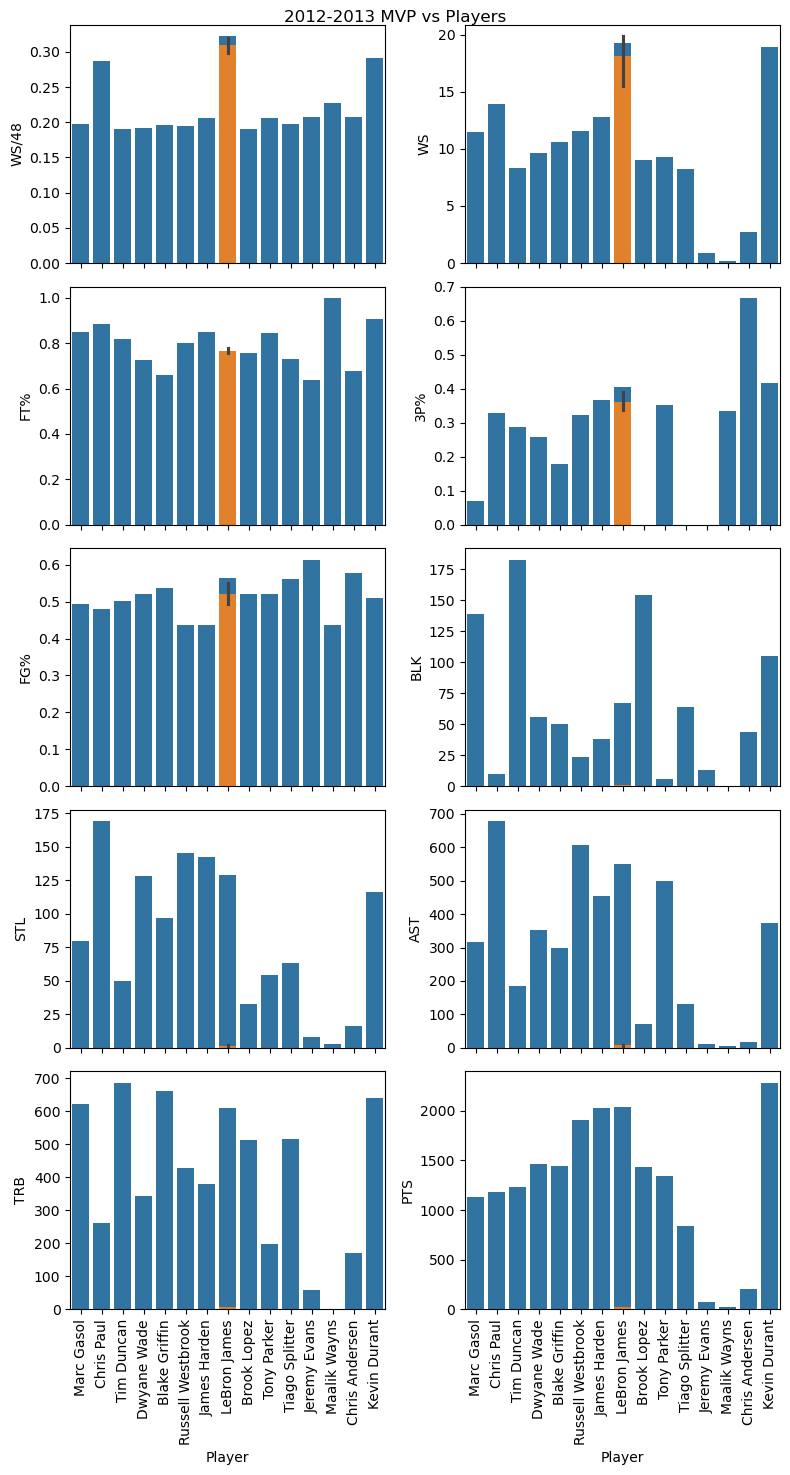

In [1276]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2012-2013 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2012-2013"]
mvps_iverson = mvps[mvps["Player"] == "LeBron James"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1305]:
ptom[ptom["Year"] == "2012-2013"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
5431,2012-2013,Marc Gasol,28.0,80.0,2796.0,1127.0,622.0,318.0,80.0,139.0,0.494,0.071,0.848,11.5,0.197
5433,2012-2013,Chris Paul,27.0,70.0,2335.0,1186.0,262.0,678.0,169.0,10.0,0.481,0.328,0.885,13.9,0.287
5435,2012-2013,Tim Duncan,36.0,69.0,2078.0,1227.0,686.0,184.0,50.0,183.0,0.502,0.286,0.817,8.3,0.191
5464,2012-2013,Dwyane Wade,31.0,69.0,2391.0,1463.0,344.0,352.0,128.0,56.0,0.521,0.258,0.725,9.6,0.192
5467,2012-2013,Blake Griffin,23.0,80.0,2598.0,1440.0,662.0,299.0,97.0,50.0,0.538,0.179,0.660,10.6,0.196
5470,2012-2013,Russell Westbrook,24.0,82.0,2861.0,1903.0,428.0,607.0,145.0,24.0,0.438,0.323,0.800,11.6,0.195
5472,2012-2013,James Harden,23.0,78.0,2985.0,2023.0,379.0,455.0,142.0,38.0,0.438,0.368,0.851,12.8,0.206
5474,2012-2013,LeBron James,28.0,76.0,2877.0,2036.0,610.0,551.0,129.0,67.0,0.565,0.406,0.753,19.3,0.322
5477,2012-2013,Brook Lopez,24.0,74.0,2253.0,1437.0,512.0,70.0,33.0,154.0,0.521,0.000,0.758,9.0,0.191
5486,2012-2013,Tony Parker,30.0,66.0,2174.0,1341.0,198.0,499.0,54.0,6.0,0.522,0.353,0.845,9.3,0.206


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
LeBron James (mvp):
2036.0	610.0	551.0	129.0	67.0	0.565	0.406	0.753	19.3	0.322
Chris Paul:
1186.0	262.0	678.0	169.0	10.0	0.481	0.328	0.885	13.9	0.287
Kevin Durant:
2280.0	640.0	374.0	116.0	105.0	0.510	0.416	0.905	18.9	0.291

LeBron winning makes sense chris paul and Kevin Durant are at a similar spots

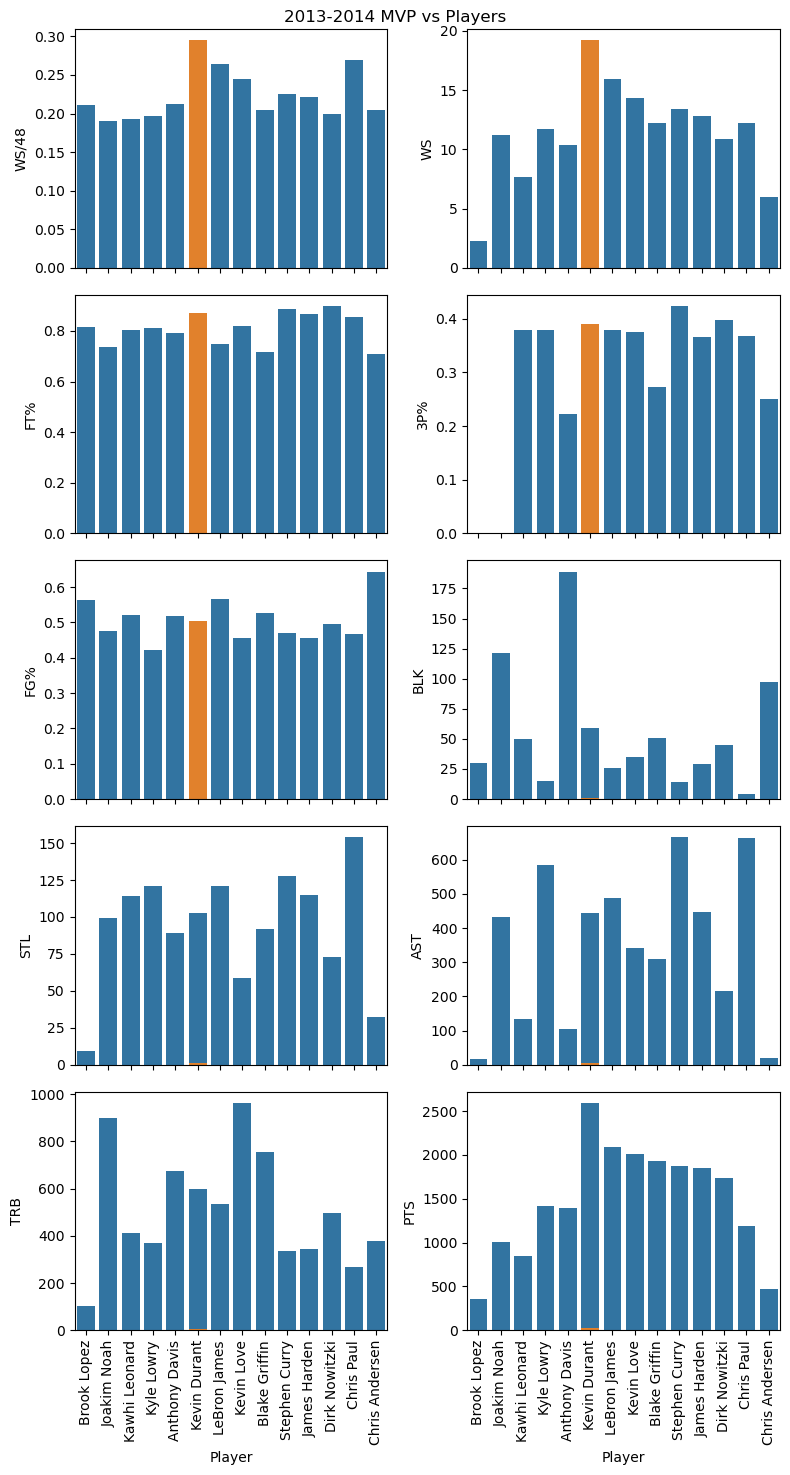

In [1277]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2013-2014 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2013-2014"]
mvps_iverson = mvps[mvps["Player"] == "Kevin Durant"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1304]:
ptom[ptom["Year"] == "2013-2014"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
5850,2013-2014,Brook Lopez,25.0,17.0,533.0,352.0,102.0,16.0,9.0,30.0,0.563,0.000,0.817,2.3,0.211
5997,2013-2014,Joakim Noah,28.0,80.0,2820.0,1007.0,900.0,431.0,99.0,121.0,0.475,0.000,0.737,11.2,0.190
6034,2013-2014,Kawhi Leonard,22.0,66.0,1923.0,844.0,412.0,133.0,114.0,50.0,0.522,0.379,0.802,7.7,0.193
6064,2013-2014,Kyle Lowry,27.0,79.0,2862.0,1417.0,369.0,586.0,121.0,15.0,0.423,0.380,0.813,11.7,0.197
6066,2013-2014,Anthony Davis,20.0,67.0,2358.0,1394.0,673.0,105.0,89.0,189.0,0.519,0.222,0.791,10.4,0.212
6075,2013-2014,Kevin Durant,25.0,81.0,3122.0,2593.0,598.0,445.0,103.0,59.0,0.503,0.391,0.873,19.2,0.295
6077,2013-2014,LeBron James,29.0,77.0,2902.0,2089.0,533.0,488.0,121.0,26.0,0.567,0.379,0.750,15.9,0.264
6078,2013-2014,Kevin Love,25.0,77.0,2797.0,2010.0,963.0,341.0,59.0,35.0,0.457,0.376,0.821,14.3,0.245
6079,2013-2014,Blake Griffin,24.0,80.0,2863.0,1930.0,757.0,309.0,92.0,51.0,0.528,0.273,0.715,12.2,0.205
6080,2013-2014,Stephen Curry,25.0,78.0,2846.0,1873.0,334.0,666.0,128.0,14.0,0.471,0.424,0.885,13.4,0.225


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Kevin Durant (mvp):
2593.0	598.0	445.0	103.0	59.0	0.503	0.391	0.873	19.2	0.295
Chris Paul:
1185.0	268.0	663.0	154.0	4.0	   0.467	0.368	0.855	12.2	0.270
LeBron James:
2089.0	533.0	488.0	121.0	26.0	0.567	0.379	0.750	15.9	0.264

Kevin Durant deserves it , wins in 6 categories
wins in 6 categories by small amounts and the ones he loses isnt far behind 


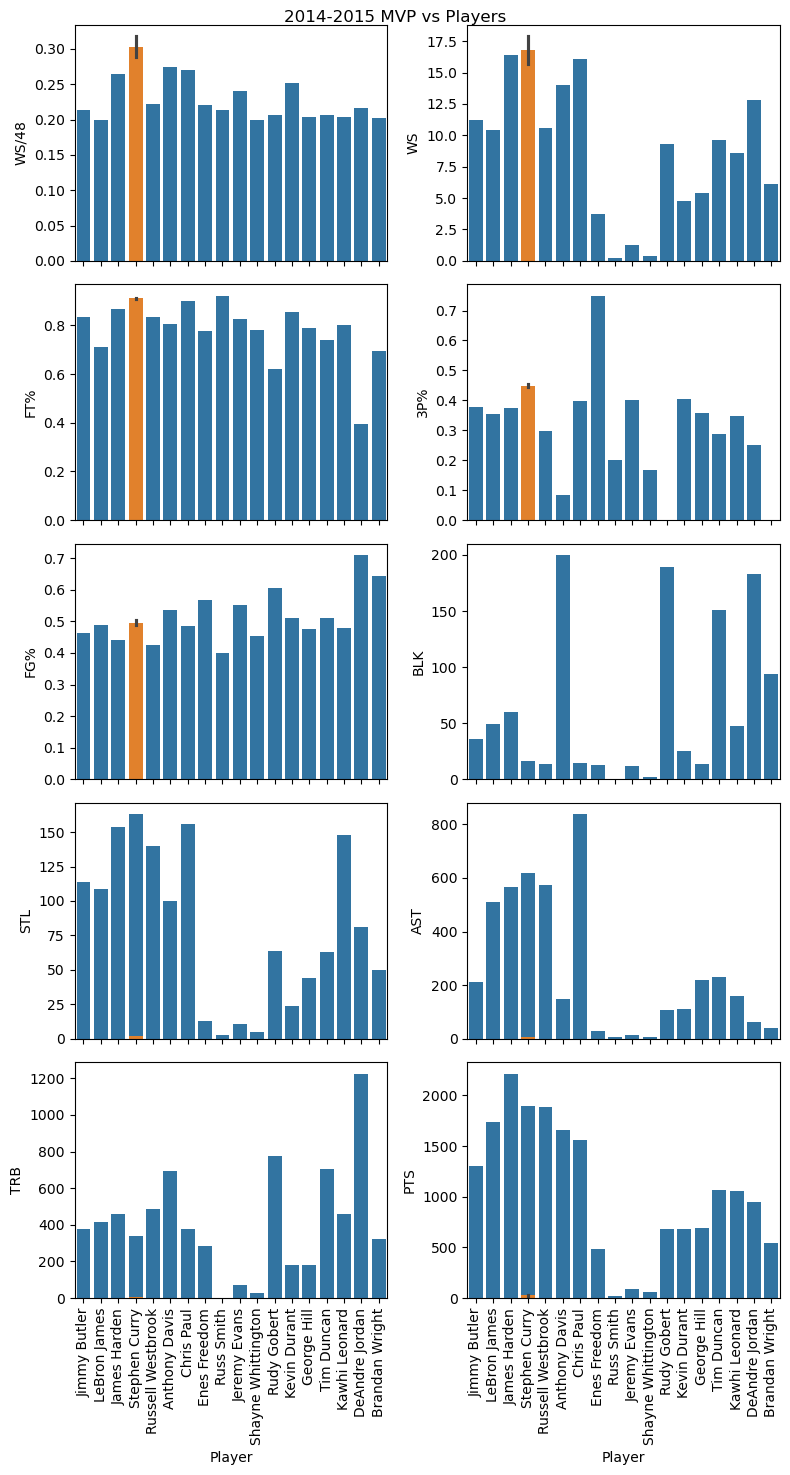

In [1278]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2014-2015 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2014-2015"]
mvps_iverson = mvps[mvps["Player"] == "Stephen Curry"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1306]:
ptom[ptom["Year"] == "2014-2015"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
6271,2014-2015,Jimmy Butler,25.0,65.0,2513.0,1301.0,379.0,212.0,114.0,36.0,0.462,0.378,0.834,11.2,0.214
6287,2014-2015,LeBron James,30.0,69.0,2493.0,1743.0,416.0,511.0,109.0,49.0,0.488,0.354,0.710,10.4,0.199
6290,2014-2015,James Harden,25.0,81.0,2981.0,2217.0,459.0,565.0,154.0,60.0,0.440,0.375,0.868,16.4,0.265
6291,2014-2015,Stephen Curry,26.0,80.0,2613.0,1900.0,341.0,619.0,163.0,16.0,0.487,0.443,0.914,15.7,0.288
6292,2014-2015,Russell Westbrook,26.0,67.0,2302.0,1886.0,488.0,574.0,140.0,14.0,0.426,0.299,0.835,10.6,0.222
6296,2014-2015,Anthony Davis,21.0,68.0,2455.0,1656.0,696.0,149.0,100.0,200.0,0.535,0.083,0.805,14.0,0.274
6298,2014-2015,Chris Paul,29.0,82.0,2857.0,1564.0,376.0,838.0,156.0,15.0,0.485,0.398,0.900,16.1,0.270
6309,2014-2015,Enes Freedom,22.0,26.0,809.0,485.0,287.0,29.0,13.0,13.0,0.566,0.750,0.776,3.7,0.220
6467,2014-2015,Russ Smith,23.0,6.0,36.0,25.0,3.0,6.0,3.0,0.0,0.400,0.200,0.923,0.2,0.214
6496,2014-2015,Jeremy Evans,27.0,38.0,266.0,90.0,71.0,13.0,11.0,12.0,0.552,0.400,0.828,1.3,0.241


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Stephen Curry (mvp):
1900.0	341.0	619.0	163.0	16.0	0.487	0.443	0.914	15.7	0.288
James Harden:
2217.0	459.0	565.0	154.0	60.0	0.440	0.375	0.868	16.4	0.265

Stephen Curry deserves it
wins in 6 categories by small amounts and the ones he loses might isnt behind 

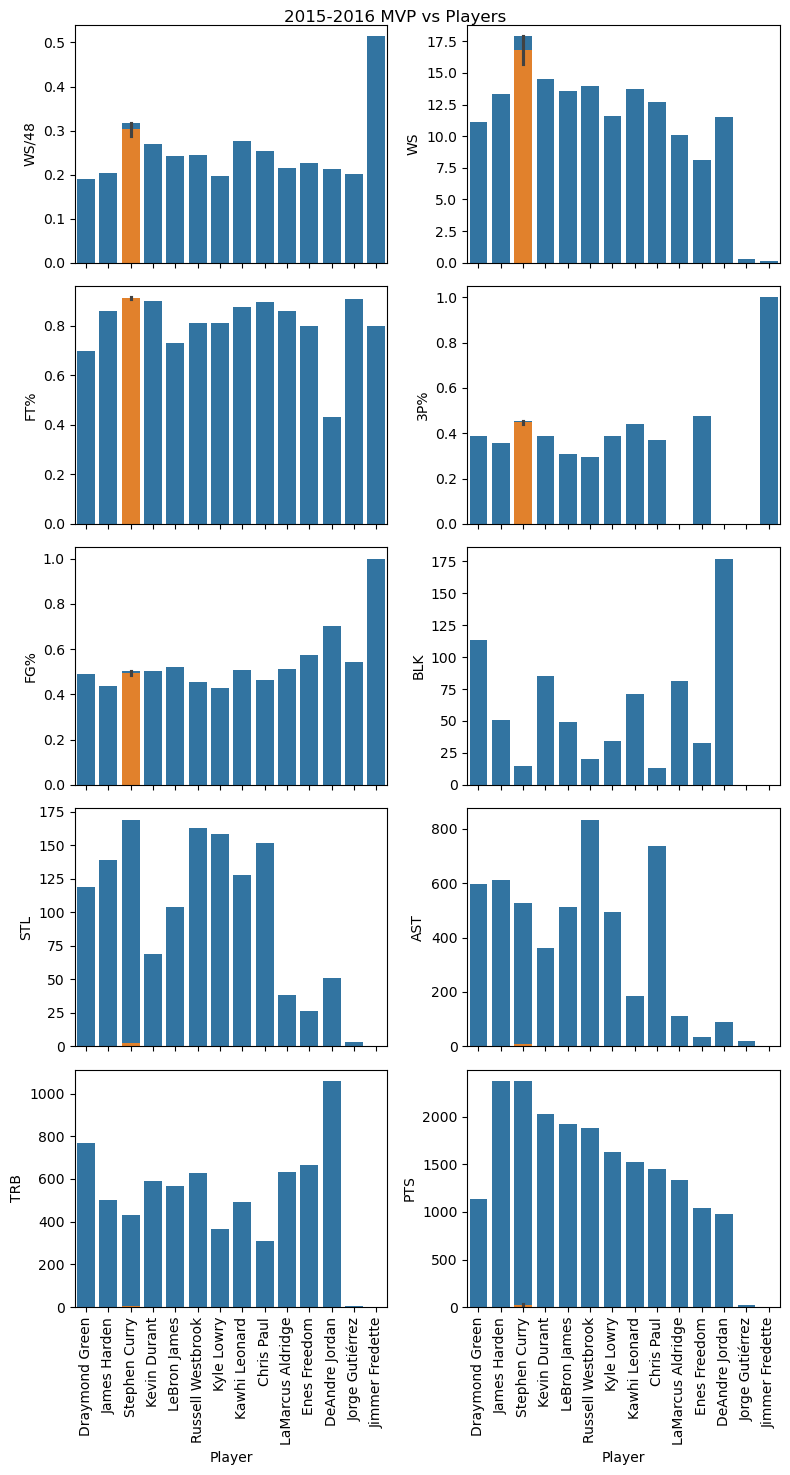

In [1279]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2015-2016 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2015-2016"]
mvps_iverson = mvps[mvps["Player"] == "Stephen Curry"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1307]:
ptom[ptom["Year"] == "2015-2016"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
7003,2015-2016,Draymond Green,25.0,81.0,2808.0,1131.0,769.0,598.0,119.0,113.0,0.490,0.388,0.696,11.1,0.190
7021,2015-2016,James Harden,26.0,82.0,3125.0,2376.0,501.0,612.0,139.0,51.0,0.439,0.359,0.860,13.3,0.204
7022,2015-2016,Stephen Curry,27.0,79.0,2700.0,2375.0,430.0,527.0,169.0,15.0,0.504,0.454,0.908,17.9,0.318
7023,2015-2016,Kevin Durant,27.0,72.0,2578.0,2029.0,589.0,361.0,69.0,85.0,0.505,0.387,0.898,14.5,0.270
7024,2015-2016,LeBron James,31.0,76.0,2709.0,1920.0,565.0,514.0,104.0,49.0,0.520,0.309,0.731,13.6,0.242
7026,2015-2016,Russell Westbrook,27.0,80.0,2750.0,1878.0,626.0,834.0,163.0,20.0,0.454,0.296,0.812,14.0,0.245
7035,2015-2016,Kyle Lowry,29.0,77.0,2851.0,1634.0,365.0,494.0,158.0,34.0,0.427,0.388,0.811,11.6,0.196
7039,2015-2016,Kawhi Leonard,24.0,72.0,2380.0,1523.0,493.0,186.0,128.0,71.0,0.506,0.443,0.874,13.7,0.277
7044,2015-2016,Chris Paul,30.0,74.0,2420.0,1446.0,310.0,738.0,152.0,13.0,0.462,0.371,0.896,12.7,0.253
7050,2015-2016,LaMarcus Aldridge,30.0,74.0,2261.0,1331.0,632.0,110.0,38.0,81.0,0.513,0.000,0.858,10.1,0.215


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Stephen Curry (mvp):
2375.0	430.0	527.0	169.0	15.0	0.504	0.454	0.908	17.9	0.318
LeBron James:
1920.0	565.0	514.0	104.0	49.0	0.520	0.309	0.731	13.6	0.242

Stephen Curry deserves it
wins in 7 categories by small amounts and the ones he loses might isnt behind 

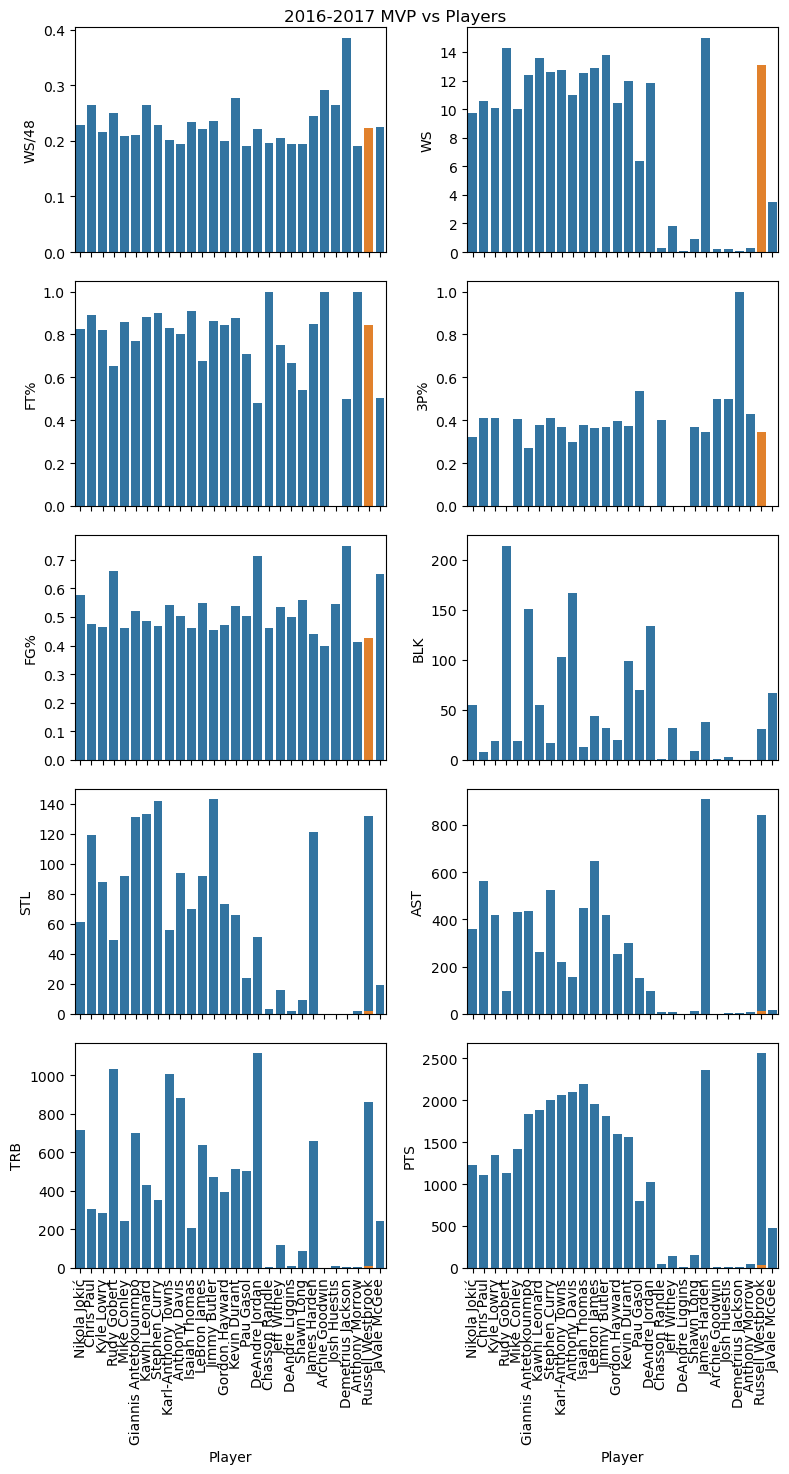

In [1280]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2016-2017 MVP vs Players")

ptom_2001 = ptom[ptom["Year"] == "2016-2017"]
mvps_iverson = mvps[mvps["Player"] == "Russell Westbrook"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1308]:
ptom[ptom["Year"] == "2016-2017"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
7330,2016-2017,Nikola Jokić,21.0,73.0,2038.0,1221.0,718.0,359.0,61.0,55.0,0.578,0.324,0.825,9.7,0.228
7338,2016-2017,Chris Paul,31.0,61.0,1921.0,1104.0,304.0,563.0,119.0,8.0,0.476,0.411,0.892,10.6,0.264
7340,2016-2017,Kyle Lowry,30.0,60.0,2244.0,1344.0,286.0,417.0,88.0,19.0,0.464,0.412,0.819,10.1,0.216
7348,2016-2017,Rudy Gobert,24.0,81.0,2744.0,1137.0,1035.0,97.0,49.0,214.0,0.661,0.000,0.653,14.3,0.250
7357,2016-2017,Mike Conley,29.0,69.0,2292.0,1415.0,241.0,433.0,92.0,19.0,0.460,0.408,0.859,10.0,0.209
7358,2016-2017,Giannis Antetokounmpo,22.0,80.0,2845.0,1832.0,700.0,434.0,131.0,151.0,0.521,0.272,0.770,12.4,0.210
7360,2016-2017,Kawhi Leonard,25.0,74.0,2474.0,1888.0,430.0,260.0,133.0,55.0,0.485,0.380,0.880,13.6,0.264
7366,2016-2017,Stephen Curry,28.0,79.0,2638.0,1999.0,353.0,524.0,142.0,17.0,0.468,0.411,0.898,12.6,0.229
7369,2016-2017,Karl-Anthony Towns,21.0,82.0,3030.0,2061.0,1007.0,220.0,56.0,103.0,0.542,0.367,0.832,12.7,0.201
7370,2016-2017,Anthony Davis,23.0,75.0,2708.0,2099.0,884.0,157.0,94.0,167.0,0.505,0.299,0.802,11.0,0.195


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Russell Westbrook (mvp):
2558.0	864.0	840.0	132.0	31.0	0.425	0.343	0.845	13.1	0.224
James Harden:
2356.0	659.0	907.0	121.0	38.0	0.440	0.347	0.847	15.0	0.245

James Harden dhould have won 
wins in 7 categories by small amounts and the ones he loses isnt much behind 

In [1281]:
years = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23", "2023-24"]
mvps2 = mvps[mvps["Year"].isin(years)]


In [1282]:
print(mvps2.describe())

             Age          G         MP        PTS        TRB      AST  \
count   7.000000   7.000000   7.000000   7.000000   7.000000  7.00000   
mean   26.285714  71.142857  33.700000  28.657143  11.242857  7.10000   
std     1.704336   5.241774   1.686219   2.483853   2.899343  1.85652   
min    24.000000  63.000000  30.400000  26.400000   5.400000  4.20000   
25%    25.000000  69.000000  33.150000  26.750000  10.500000  5.75000   
50%    26.000000  72.000000  34.600000  27.700000  12.400000  7.90000   
75%    28.000000  73.000000  34.600000  29.950000  13.050000  8.55000   
max    28.000000  79.000000  35.400000  33.100000  13.800000  9.00000   

            STL       BLK       FG%       3P%       FT%         WS     WS/48  
count  7.000000  7.000000  7.000000  7.000000  7.000000   7.000000  7.000000  
mean   1.328571  1.057143  0.551429  0.334429  0.796000  14.428571  0.287857  
std    0.281154  0.390969  0.047289  0.044041  0.086066   2.046716  0.014679  
min    1.000000  0.700000 

In [1283]:
ptom4 = ptom[ptom["PTS"] >= 26]
ptom4 = ptom[ptom["TRB"] >= 5.4]
ptom4 = ptom[ptom["AST"] >= 4.2]
ptom4 = ptom[ptom["STL"] >= 1]
ptom4 = ptom[ptom["BLK"] >= 0.7]
ptom4 = ptom[ptom["FG%"] >= 0.44]
ptom4 = ptom[ptom["3P%"] >= 0.25]
ptom4 = ptom[ptom["FT%"] >= 0.63]
ptom4 = ptom[ptom["WS"] >= 11.1]
ptom4 = ptom[ptom["WS/48"] >= 0.25]

same steps as before because to many names where being plotted in the charts 2017-2024

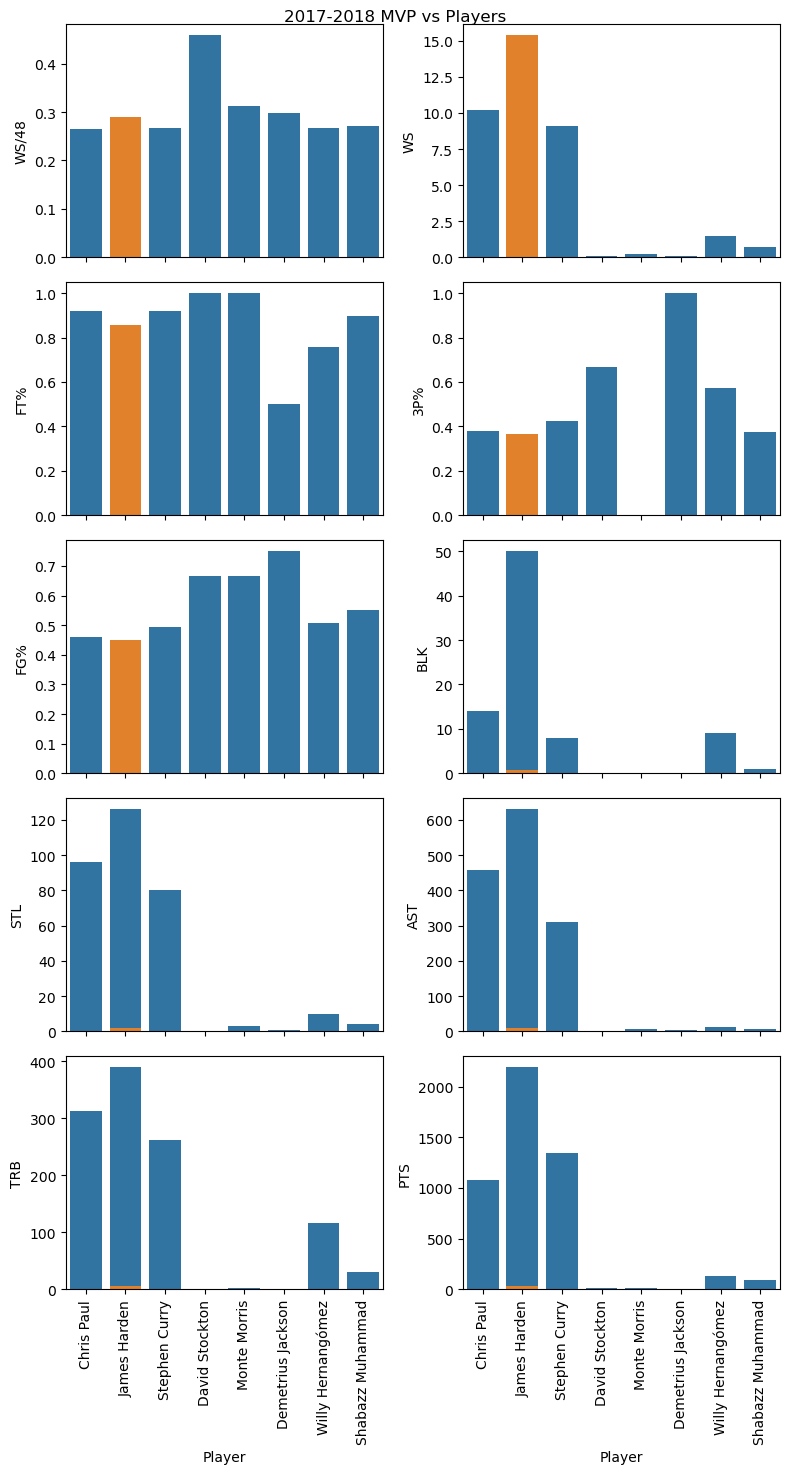

In [1284]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2017-2018 MVP vs Players")

ptom_2001 = ptom4[ptom4["Year"] == "2017-2018"]
mvps_iverson = mvps[mvps["Player"] == "James Harden"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1309]:
ptom4[ptom4["Year"] == "2017-2018"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
8016,2017-2018,Chris Paul,32.0,58.0,1847.0,1081.0,313.0,457.0,96.0,14.0,0.460,0.380,0.919,10.2,0.265
8020,2017-2018,James Harden,28.0,72.0,2551.0,2191.0,389.0,630.0,126.0,50.0,0.449,0.367,0.858,15.4,0.289
8033,2017-2018,Stephen Curry,29.0,51.0,1631.0,1346.0,261.0,310.0,80.0,8.0,0.495,0.423,0.921,9.1,0.267
8211,2017-2018,David Stockton,26.0,3.0,9.0,10.0,0.0,0.0,0.0,0.0,0.667,0.667,1.000,0.1,0.459
8229,2017-2018,Monte Morris,22.0,3.0,25.0,10.0,2.0,7.0,3.0,0.0,0.667,0.000,1.000,0.2,0.312
8233,2017-2018,Demetrius Jackson,23.0,3.0,17.0,8.0,1.0,4.0,1.0,0.0,0.750,1.000,0.500,0.1,0.298
8387,2017-2018,Willy Hernangómez,23.0,22.0,262.0,135.0,116.0,12.0,10.0,9.0,0.506,0.571,0.758,1.5,0.266
8411,2017-2018,Shabazz Muhammad,25.0,11.0,117.0,94.0,31.0,7.0,4.0,1.0,0.552,0.375,0.895,0.7,0.271


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
James Harden (mvp):
2191.0	389.0	630.0	126.0	50.0	0.449	0.367	0.858	15.4	0.289
James Harden wins deservingly

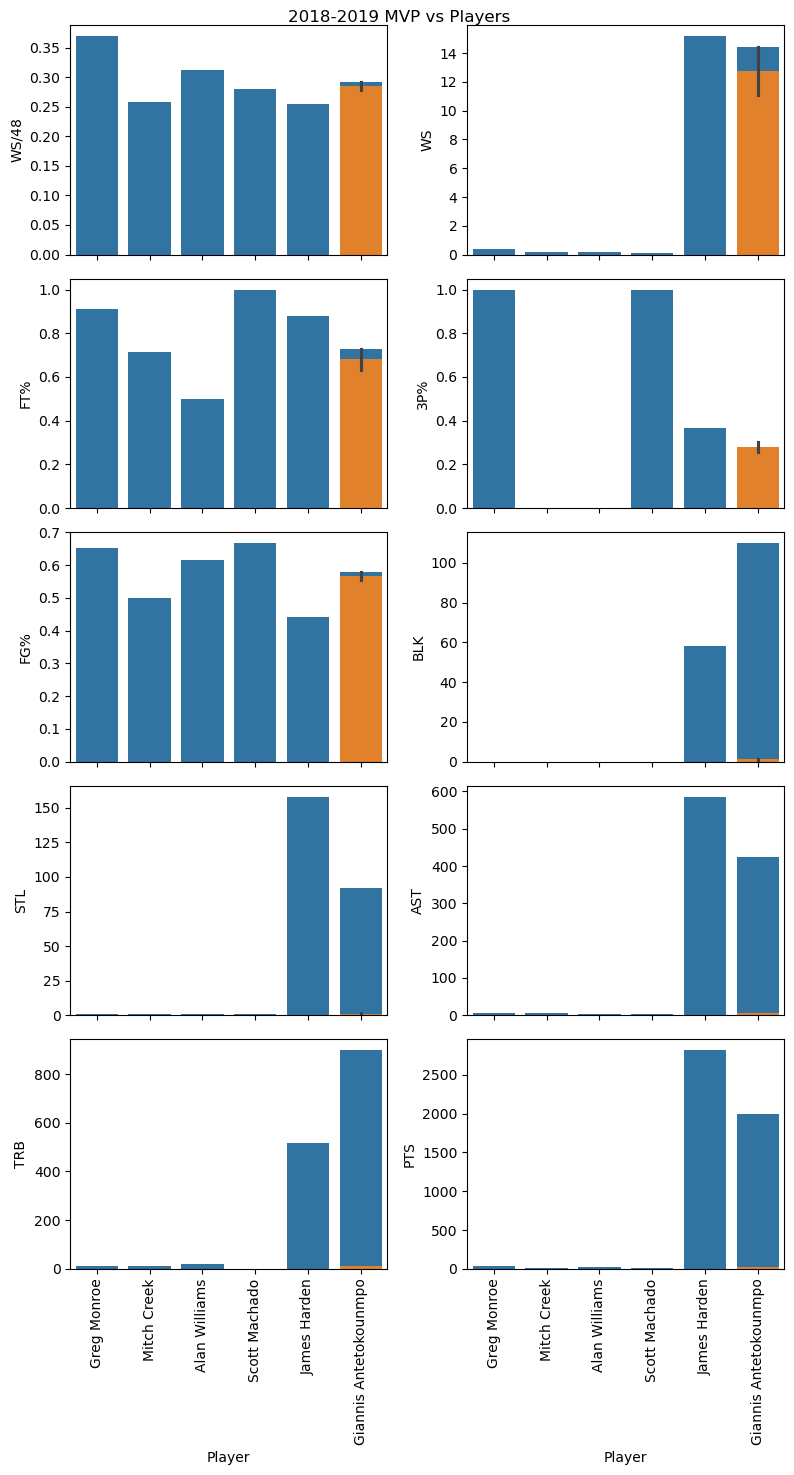

In [1285]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2018-2019 MVP vs Players")

ptom_2001 = ptom4[ptom4["Year"] == "2018-2019"]
mvps_iverson = mvps[mvps["Player"] == "Giannis Antetokounmpo"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1310]:
ptom4[ptom4["Year"] == "2018-2019"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
8441,2018-2019,Greg Monroe,28.0,3.0,52.0,41.0,13.0,7.0,1.0,0.0,0.652,1.000,0.909,0.4,0.370
8605,2018-2019,Mitch Creek,26.0,4.0,36.0,15.0,10.0,5.0,1.0,0.0,0.500,0.000,0.714,0.2,0.258
8611,2018-2019,Alan Williams,26.0,5.0,26.0,18.0,19.0,3.0,1.0,0.0,0.615,0.000,0.500,0.2,0.312
8643,2018-2019,Scott Machado,28.0,4.0,19.0,10.0,0.0,3.0,1.0,0.0,0.667,1.000,1.000,0.1,0.281
8838,2018-2019,James Harden,29.0,78.0,2867.0,2818.0,518.0,586.0,158.0,58.0,0.442,0.368,0.879,15.2,0.254
8844,2018-2019,Giannis Antetokounmpo,24.0,72.0,2358.0,1994.0,898.0,424.0,92.0,110.0,0.578,0.256,0.729,14.4,0.292


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Giannis Antetokounmpo (mvp):
1994.0	898.0	424.0	92.0	110.0	0.578	0.256	0.729	14.4	0.292
James Harden:
2818.0	518.0	586.0	158.0	58.0	0.442	0.368	0.879	15.2	0.254

James Harden should have won 
wins in 6 categories by small amounts and the ones he loses isnt much behind 

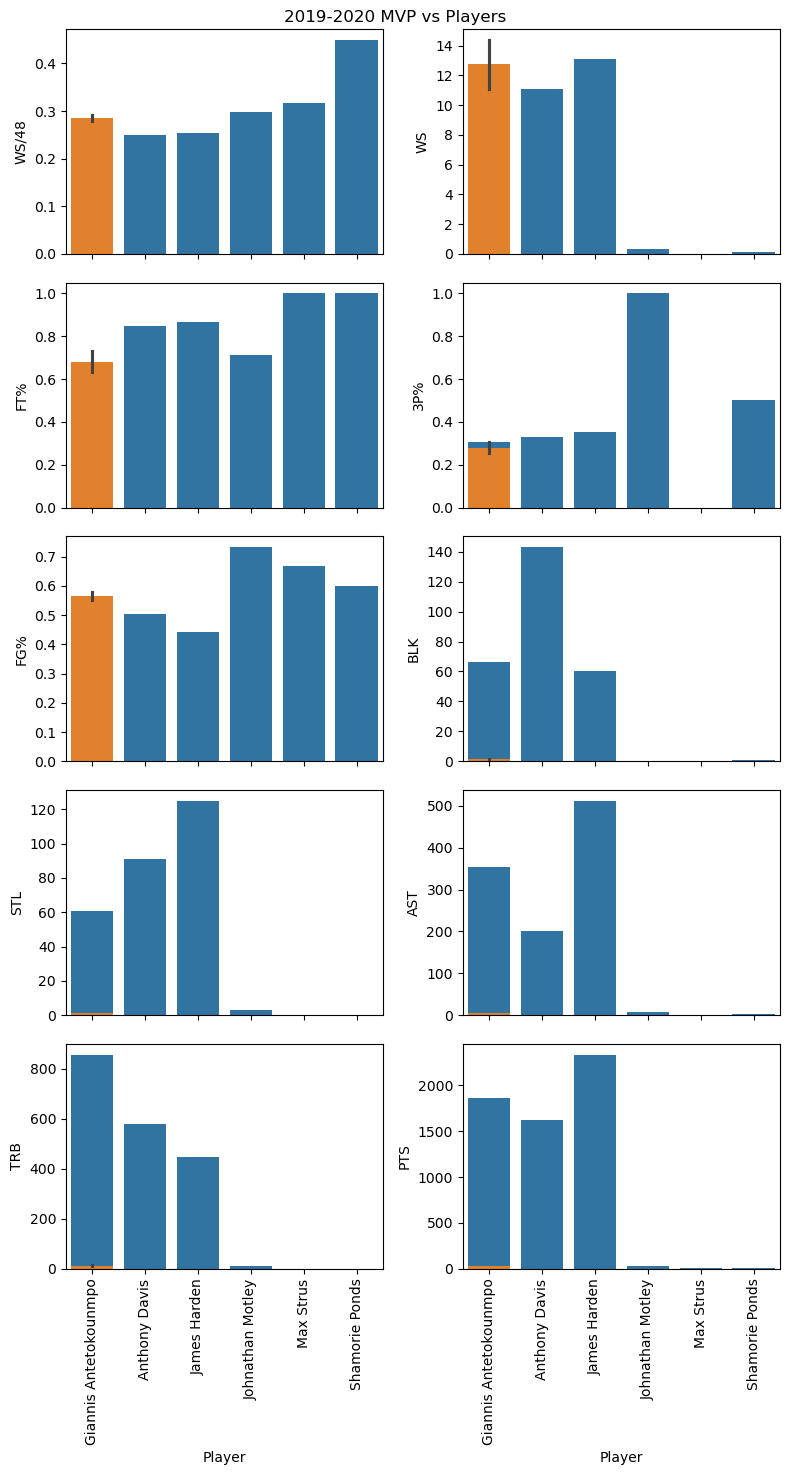

In [1286]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2019-2020 MVP vs Players")

ptom_2001 = ptom4[ptom4["Year"] == "2019-2020"]
mvps_iverson = mvps[mvps["Player"] == "Giannis Antetokounmpo"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1311]:
ptom4[ptom4["Year"] == "2019-2020"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
9081,2019-2020,Giannis Antetokounmpo,25.0,63.0,1917.0,1857.0,856.0,354.0,61.0,66.0,0.553,0.304,0.633,11.1,0.279
9087,2019-2020,Anthony Davis,26.0,62.0,2131.0,1618.0,577.0,200.0,91.0,143.0,0.503,0.330,0.846,11.1,0.250
9176,2019-2020,James Harden,30.0,68.0,2483.0,2335.0,446.0,512.0,125.0,60.0,0.444,0.355,0.865,13.1,0.254
9491,2019-2020,Johnathan Motley,24.0,13.0,41.0,28.0,10.0,8.0,3.0,0.0,0.733,1.000,0.714,0.3,0.299
9517,2019-2020,Max Strus,23.0,2.0,6.0,5.0,1.0,0.0,0.0,0.0,0.667,0.000,1.000,0.0,0.316
9538,2019-2020,Shamorie Ponds,21.0,4.0,11.0,9.0,1.0,2.0,0.0,1.0,0.600,0.500,1.000,0.1,0.450


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Giannis Antetokounmpo (mvp):
1857.0	856.0	354.0	61.0	66.0	0.553	0.304	0.633	11.1	0.279
James Harden:
2335.0	446.0	512.0	125.0	60.0	0.444	0.355	0.865	13.1	0.254

James Harden should have won 
wins in 6 categories by small amounts and the ones he loses isnt much behind 

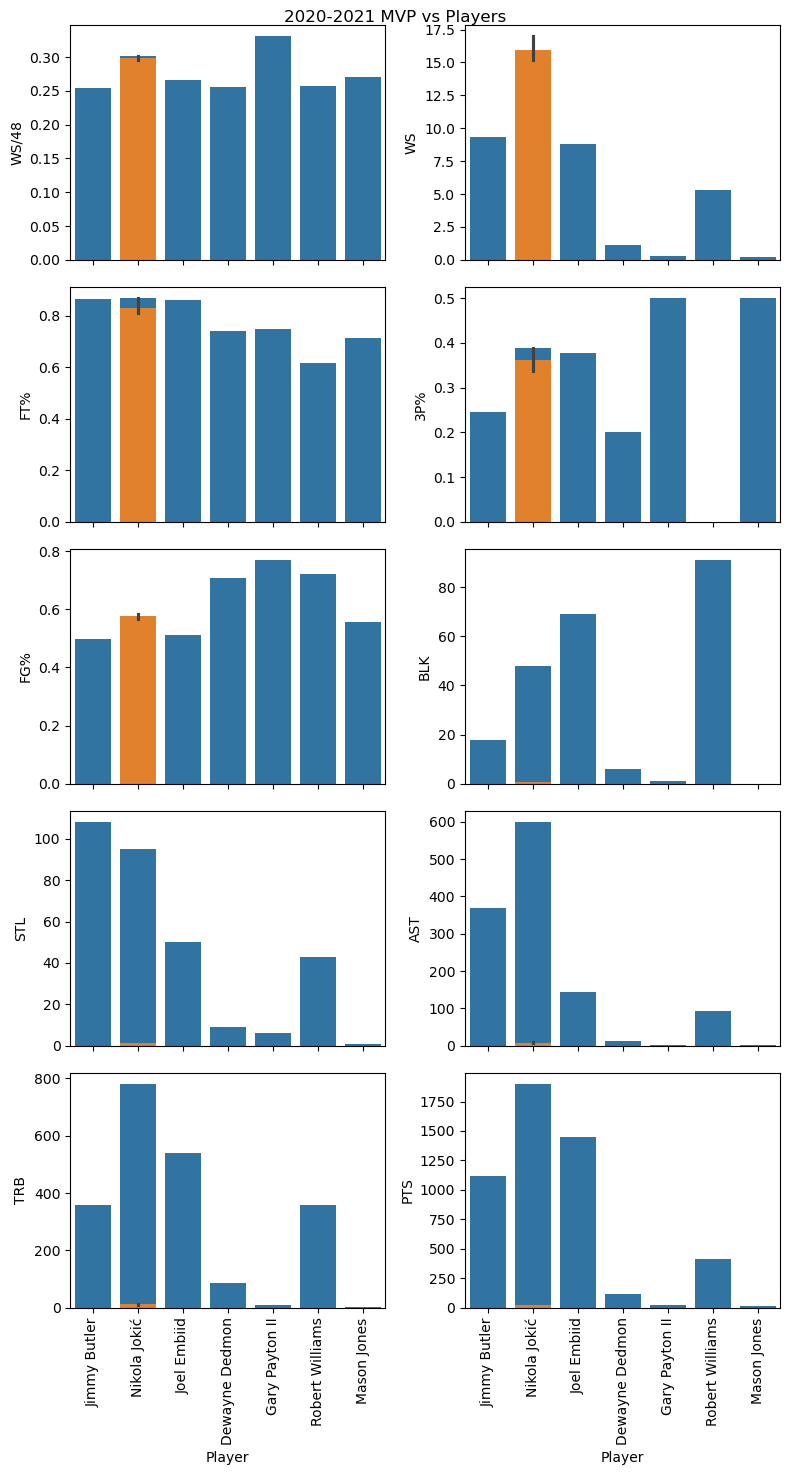

In [1287]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2020-2021 MVP vs Players")

ptom_2001 = ptom4[ptom4["Year"] == "2020-2021"]
mvps_iverson = mvps[mvps["Player"] == "Nikola Jokić"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1312]:
ptom4[ptom4["Year"] == "2020-2021"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
9791,2020-2021,Jimmy Butler,31.0,52.0,1745.0,1116.0,359.0,369.0,108.0,18.0,0.497,0.245,0.863,9.3,0.255
9809,2020-2021,Nikola Jokić,25.0,72.0,2488.0,1898.0,780.0,599.0,95.0,48.0,0.566,0.388,0.868,15.6,0.301
9824,2020-2021,Joel Embiid,26.0,51.0,1585.0,1451.0,539.0,145.0,50.0,69.0,0.513,0.377,0.859,8.8,0.266
9993,2020-2021,Dewayne Dedmon,31.0,16.0,210.0,113.0,86.0,12.0,9.0,6.0,0.708,0.200,0.741,1.1,0.256
10064,2020-2021,Gary Payton II,28.0,10.0,40.0,25.0,11.0,1.0,6.0,1.0,0.769,0.500,0.750,0.3,0.331
10159,2020-2021,Robert Williams,23.0,52.0,985.0,417.0,358.0,94.0,43.0,91.0,0.721,0.000,0.616,5.3,0.258
10238,2020-2021,Mason Jones,22.0,6.0,27.0,16.0,4.0,3.0,1.0,0.0,0.556,0.500,0.714,0.2,0.270


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Nikola Jokić (mvp):
1898.0	780.0	599.0	95.0	48.0	0.566	0.388	0.868	15.6	0.301
Nikola Jokić deserves win 

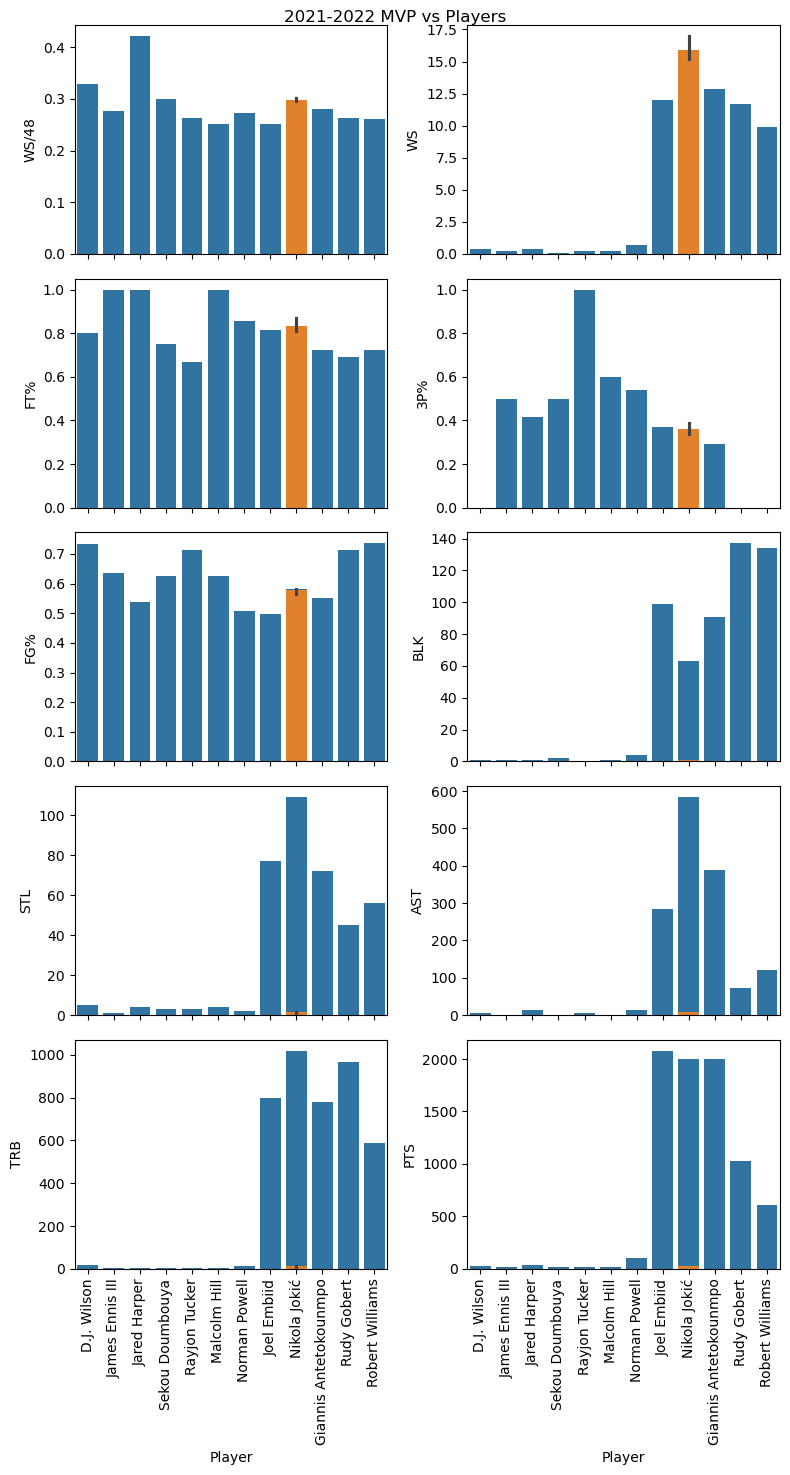

In [1288]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2021-2022 MVP vs Players")

ptom_2001 = ptom4[ptom4["Year"] == "2021-2022"]
mvps_iverson = mvps[mvps["Player"] == "Nikola Jokić"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1313]:
ptom4[ptom4["Year"] == "2021-2022"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
10293,2021-2022,D.J. Wilson,25.0,4.0,54.0,30.0,16.0,5.0,5.0,1.0,0.733,0.000,0.800,0.4,0.328
10300,2021-2022,James Ennis III,31.0,2.0,28.0,20.0,5.0,0.0,1.0,1.0,0.636,0.500,1.000,0.2,0.277
10312,2021-2022,Jared Harper,24.0,5.0,43.0,37.0,2.0,14.0,4.0,1.0,0.538,0.417,1.000,0.4,0.422
10329,2021-2022,Sekou Doumbouya,21.0,2.0,16.0,14.0,6.0,0.0,3.0,2.0,0.625,0.500,0.750,0.1,0.300
10344,2021-2022,Rayjon Tucker,24.0,2.0,42.0,15.0,4.0,6.0,3.0,0.0,0.714,1.000,0.667,0.2,0.264
10412,2021-2022,Malcolm Hill,26.0,3.0,46.0,17.0,6.0,1.0,4.0,1.0,0.625,0.600,1.000,0.2,0.252
10575,2021-2022,Norman Powell,28.0,5.0,125.0,107.0,14.0,14.0,2.0,4.0,0.508,0.542,0.857,0.7,0.272
10678,2021-2022,Joel Embiid,27.0,68.0,2297.0,2079.0,796.0,284.0,77.0,99.0,0.499,0.371,0.814,12.0,0.252
10680,2021-2022,Nikola Jokić,26.0,74.0,2476.0,2004.0,1019.0,584.0,109.0,63.0,0.583,0.337,0.810,15.2,0.296
10681,2021-2022,Giannis Antetokounmpo,27.0,67.0,2204.0,2002.0,778.0,388.0,72.0,91.0,0.553,0.293,0.722,12.9,0.281


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Nikola Jokić (mvp):
2004.0	1019.0	584.0	109.0	63.0	0.583	0.337	0.810	15.2	0.296
Nikola Jokić deserves win 

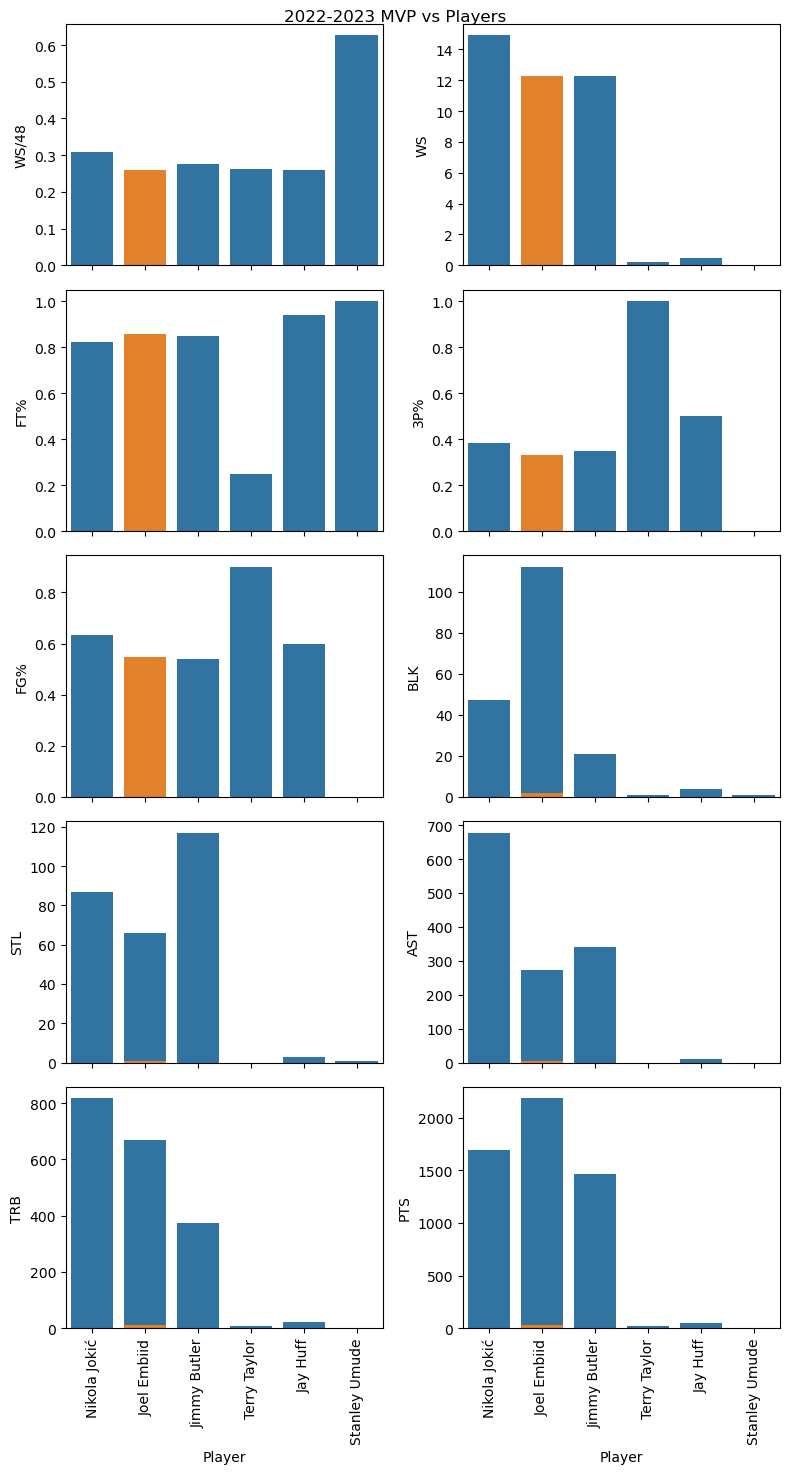

In [1289]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2022-2023 MVP vs Players")

ptom_2001 = ptom4[ptom4["Year"] == "2022-2023"]
mvps_iverson = mvps[mvps["Player"] == "Joel Embiid"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1314]:
ptom4[ptom4["Year"] == "2022-2023"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
11215,2022-2023,Nikola Jokić,27.0,69.0,2323.0,1690.0,817.0,678.0,87.0,47.0,0.632,0.383,0.822,14.9,0.308
11230,2022-2023,Joel Embiid,28.0,66.0,2284.0,2183.0,670.0,274.0,66.0,112.0,0.548,0.330,0.857,12.3,0.259
11243,2022-2023,Jimmy Butler,33.0,64.0,2138.0,1466.0,375.0,340.0,117.0,21.0,0.539,0.350,0.850,12.3,0.277
11395,2022-2023,Terry Taylor,23.0,5.0,36.0,20.0,8.0,0.0,0.0,1.0,0.900,1.000,0.250,0.2,0.262
11406,2022-2023,Jay Huff,24.0,7.0,95.0,51.0,21.0,10.0,3.0,4.0,0.600,0.500,0.938,0.5,0.261
11428,2022-2023,Stanley Umude,23.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,0.000,0.000,1.000,0.0,0.626


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Joel Embiid (mvp):
2183.0	670.0	274.0	66.0	112.0	0.548	0.330	0.857	12.3	0.259
Nikola Jokić:
1690.0	817.0	678.0	87.0	47.0	0.632	0.383	0.822	14.9	0.308

Nikola Jokić should have won 
wins in 7 categories by small amounts and the ones he loses isnt much behind 

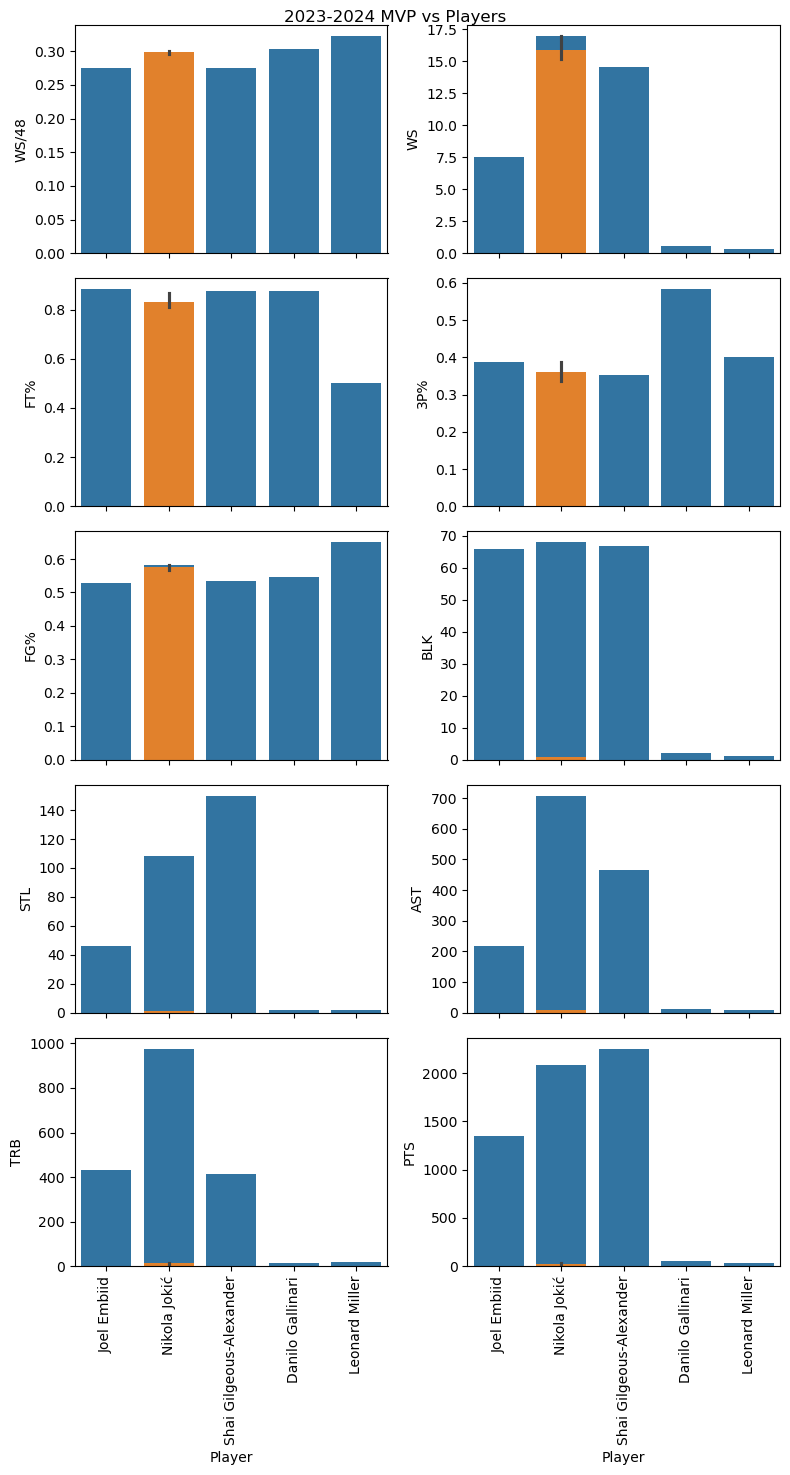

In [1290]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharex="col")
fig.suptitle("2023-2024 MVP vs Players")

ptom_2001 = ptom4[ptom4["Year"] == "2023-2024"]
mvps_iverson = mvps[mvps["Player"] == "Nikola Jokić"]

# WS/48
sns.barplot(data=ptom_2001, x="Player", y="WS/48", ax=axes[0, 0])
sns.barplot(data=mvps_iverson, x="Player", y="WS/48", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

#WS
sns.barplot(data=ptom_2001, x="Player", y="WS", ax=axes[0, 1])
sns.barplot(data=mvps_iverson, x="Player", y="WS", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)  

#FT%
sns.barplot(data=ptom_2001, x="Player", y="FT%", ax=axes[1, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FT%", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)  

#3P%
sns.barplot(data=ptom_2001, x="Player", y="3P%", ax=axes[1, 1])
sns.barplot(data=mvps_iverson, x="Player", y="3P%", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)  

#FG%
sns.barplot(data=ptom_2001, x="Player", y="FG%", ax=axes[2, 0])
sns.barplot(data=mvps_iverson, x="Player", y="FG%", ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=90) 

#BLK
sns.barplot(data=ptom_2001, x="Player", y="BLK", ax=axes[2, 1])
sns.barplot(data=mvps_iverson, x="Player", y="BLK", ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', rotation=90) 

#STL
sns.barplot(data=ptom_2001, x="Player", y="STL", ax=axes[3, 0])
sns.barplot(data=mvps_iverson, x="Player", y="STL", ax=axes[3, 0])
axes[3, 0].tick_params(axis='x', rotation=90) 

#AST
sns.barplot(data=ptom_2001, x="Player", y="AST", ax=axes[3, 1])
sns.barplot(data=mvps_iverson, x="Player", y="AST", ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90) 

#TRB
sns.barplot(data=ptom_2001, x="Player", y="TRB", ax=axes[4, 0])
sns.barplot(data=mvps_iverson, x="Player", y="TRB", ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', rotation=90) 

#PTS
sns.barplot(data=ptom_2001, x="Player", y="PTS", ax=axes[4, 1])
sns.barplot(data=mvps_iverson, x="Player", y="PTS", ax=axes[4, 1])
axes[4, 1].tick_params(axis='x', rotation=90) 

# Adjust layout and display
plt.tight_layout()
plt.show()

In [1315]:
ptom4[ptom4["Year"] == "2023-2024"]

,Year,Player,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
11746,2023-2024,Joel Embiid,29.0,39.0,1309.0,1353.0,430.0,219.0,46.0,66.0,0.529,0.388,0.883,7.5,0.275
11790,2023-2024,Nikola Jokić,28.0,79.0,2737.0,2085.0,976.0,708.0,108.0,68.0,0.583,0.359,0.817,17.0,0.299
11793,2023-2024,Shai Gilgeous-Alexander,25.0,75.0,2553.0,2254.0,415.0,465.0,150.0,67.0,0.535,0.353,0.874,14.6,0.275
11969,2023-2024,Danilo Gallinari,35.0,6.0,90.0,52.0,14.0,12.0,2.0,2.0,0.545,0.583,0.875,0.6,0.304
12225,2023-2024,Leonard Miller,20.0,17.0,52.0,29.0,20.0,8.0,2.0,1.0,0.650,0.400,0.500,0.3,0.323


looked at graph to pick players that compete with mvp of that year, then got their stats
(PTS TRB AST STL BLK FG% 3P% FT% WS	WS/48)
Nikola Jokić (mvp):
2085.0	976.0	708.0	108.0	68.0	0.583	0.359	0.817	17.0	0.299
Shai Gilgeous-Alexander:
2254.0	415.0	465.0	150.0	67.0	0.535	0.353	0.874	14.6	0.275

Nikola Jokić deserves the win 
wins in 8 categories by small amounts and the ones he loses isnt much behind 